# Parity Plots for Velocity Model-1, Model-2 and Current Model


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from pathlib import Path
import sys
from matplotlib_inline.backend_inline import set_matplotlib_formats
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from matplotlib.gridspec import GridSpec

In [3]:
sys.path.append(str(Path().resolve().parent.parent))
from path_manager import VEL_MODELS, MISC_DIR, PLOT_DIR

          time      speed
17  312.244898  24.285714
18  330.612245  24.880952
19  348.979592  25.476190
20  367.346939  22.630385
21  385.714286  23.650794
22  404.081633  24.671202
23  422.448980  25.518707
24  440.816327  25.242347
25  459.183673  24.965986
26  477.551020  24.689626
27  495.918367  24.413265
28  514.285714  24.136905
29  532.653061  23.860544
30  551.020408  23.584184
31  569.387755  23.307823
32  587.755102  23.031463
33  606.122449  22.755102
34  624.489796  22.478741
35  642.857143  22.202381
36  661.224490  21.984127
37  679.591837  22.579365
38  697.959184  23.174603
39  716.326531  23.769841
40  734.693878  23.979592
41  753.061224  24.092971
42  771.428571  24.206349
43  789.795918  24.319728


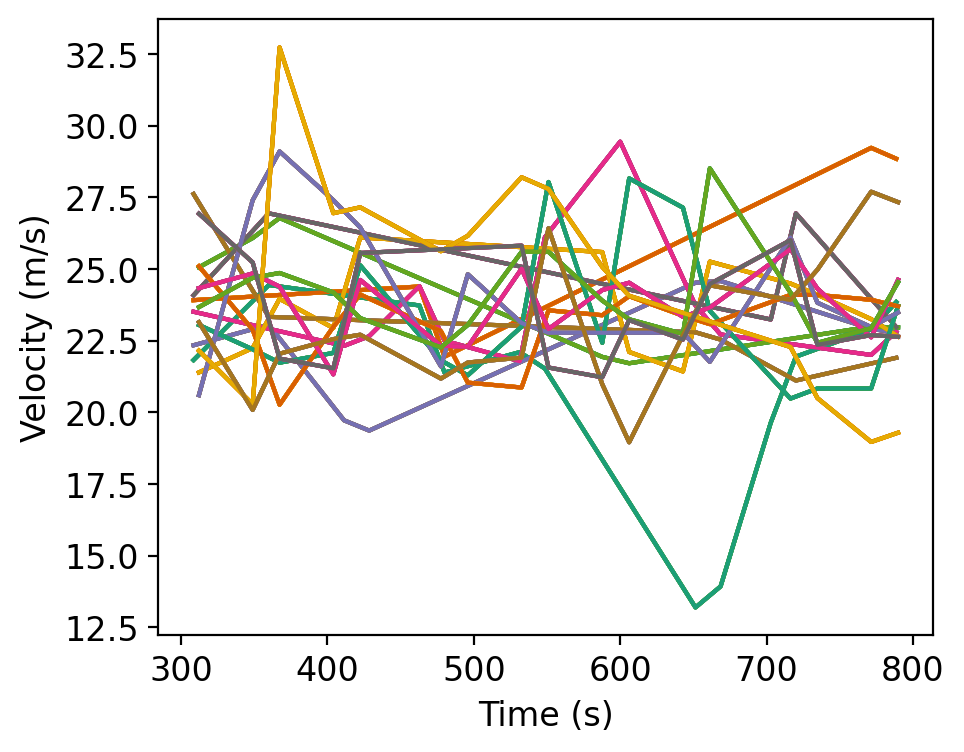

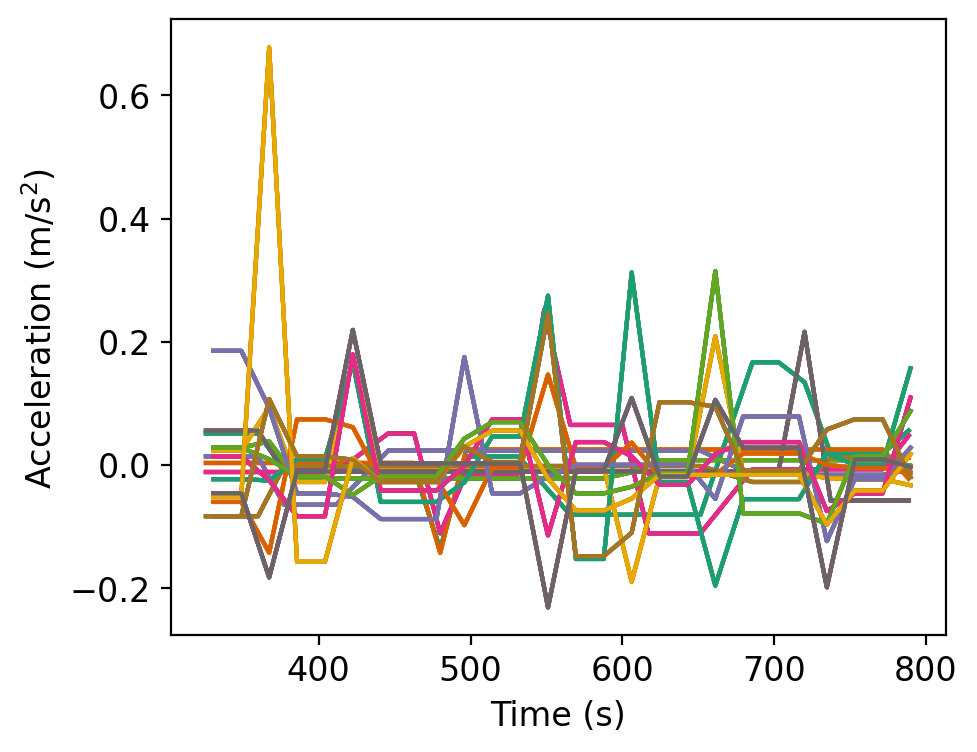

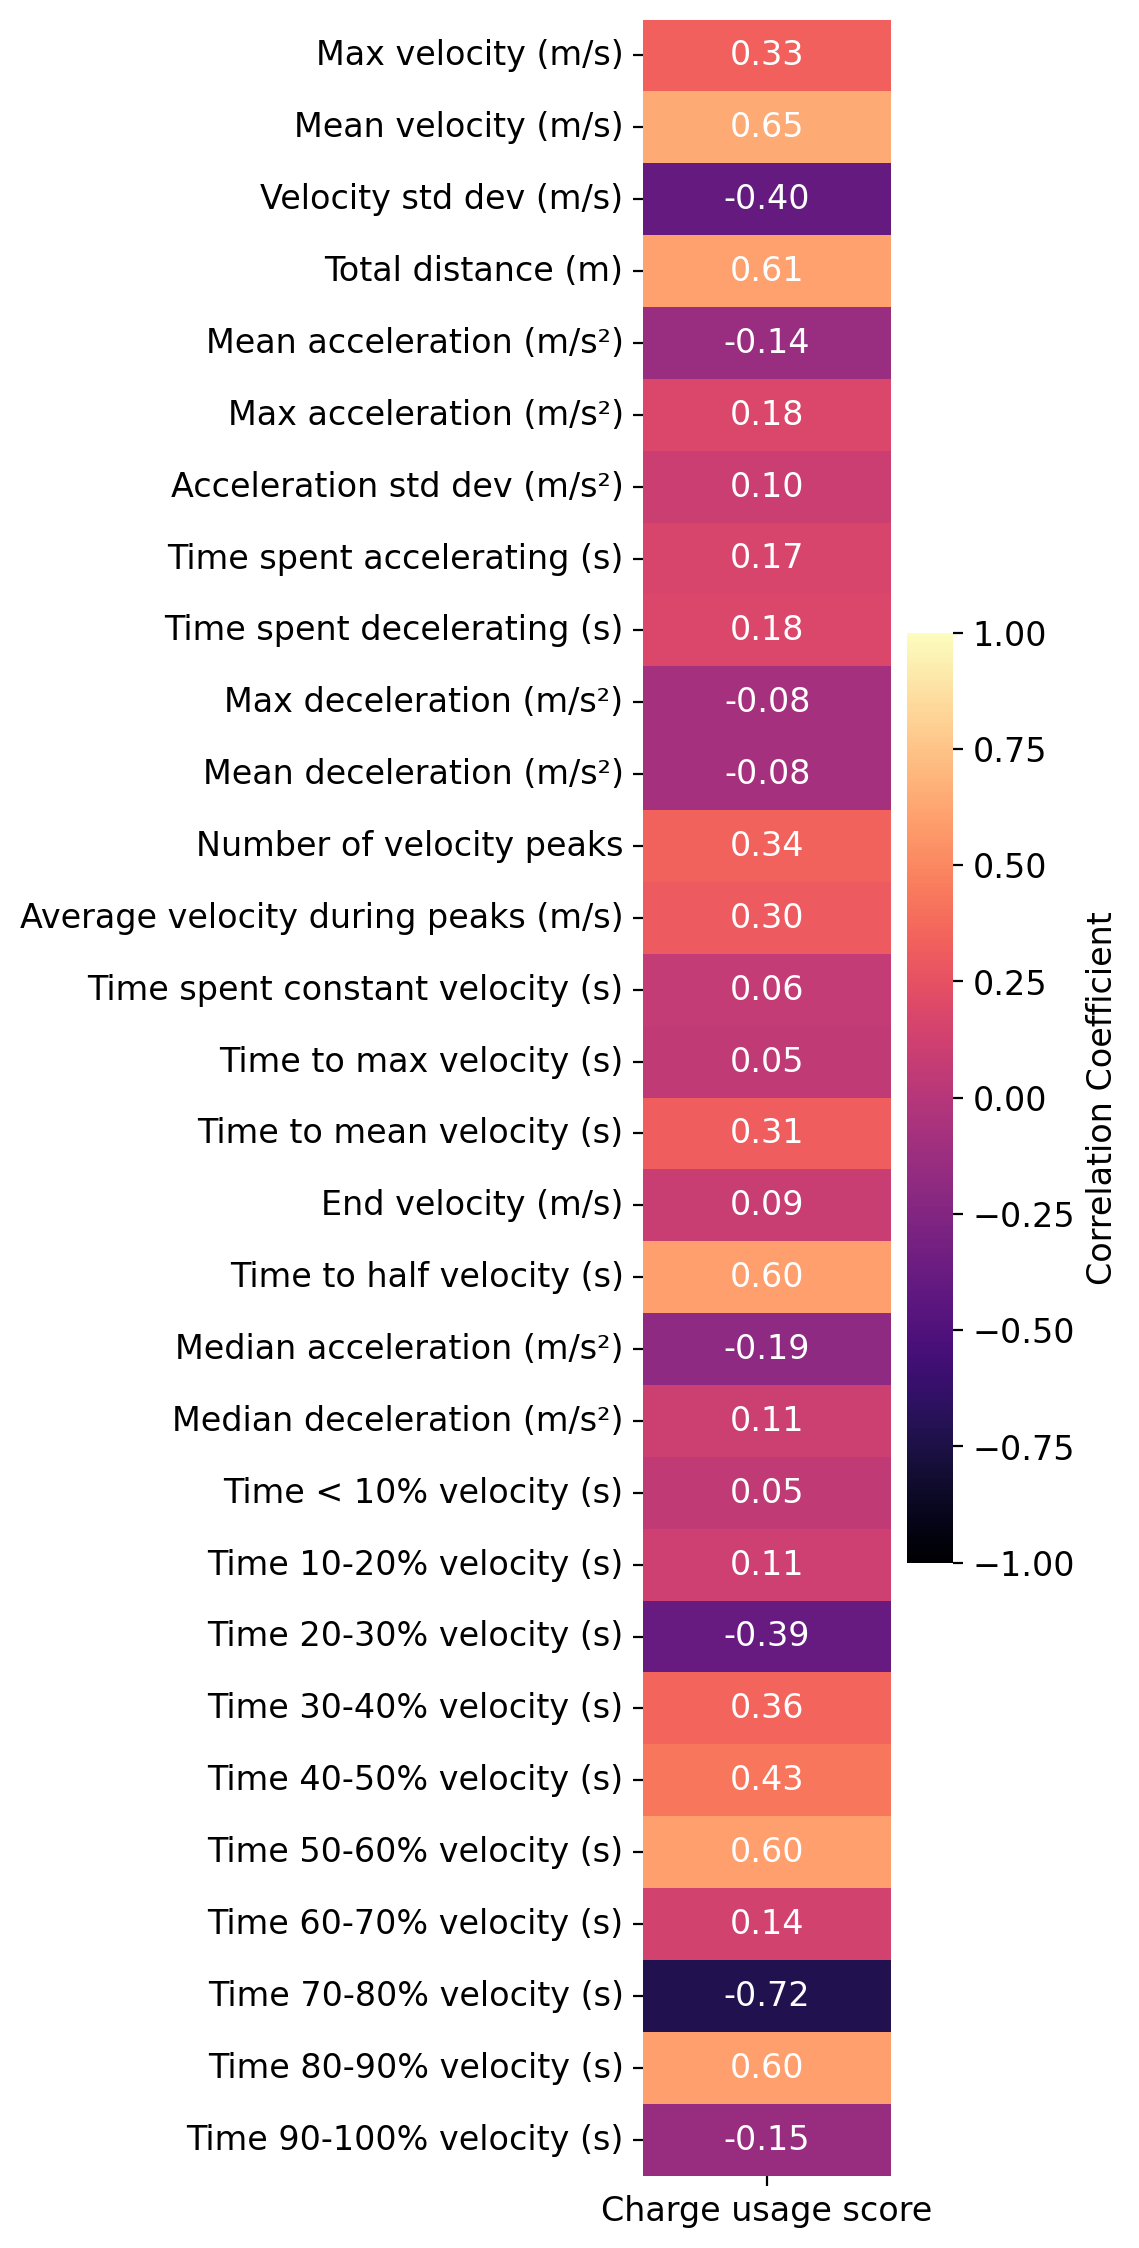

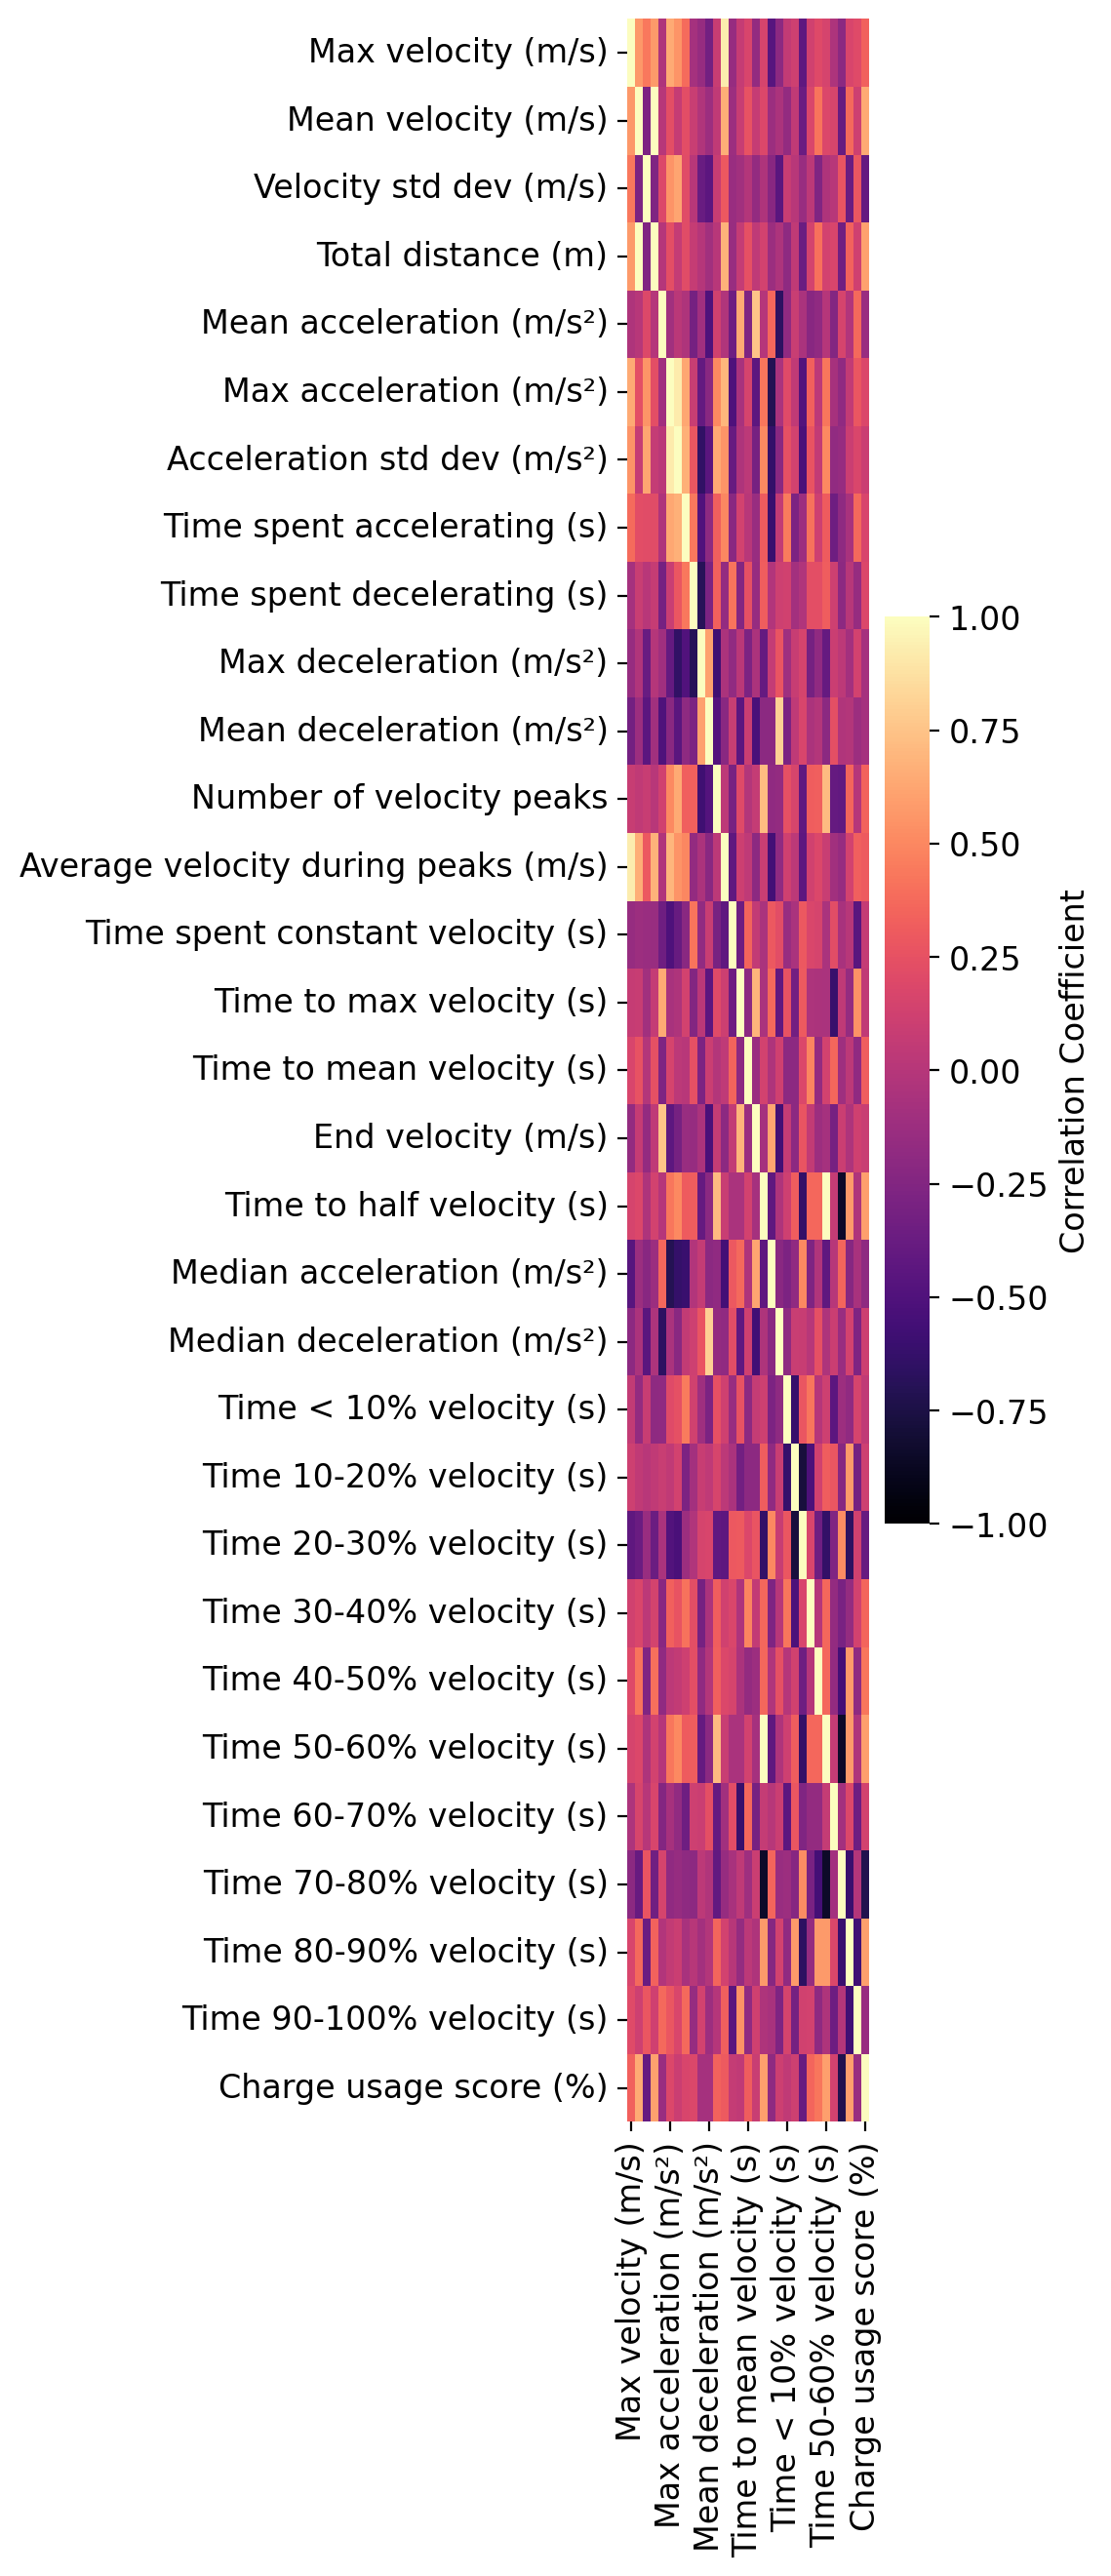

MAE: 5.488276300016003
MAPE: 0.07347141770712964


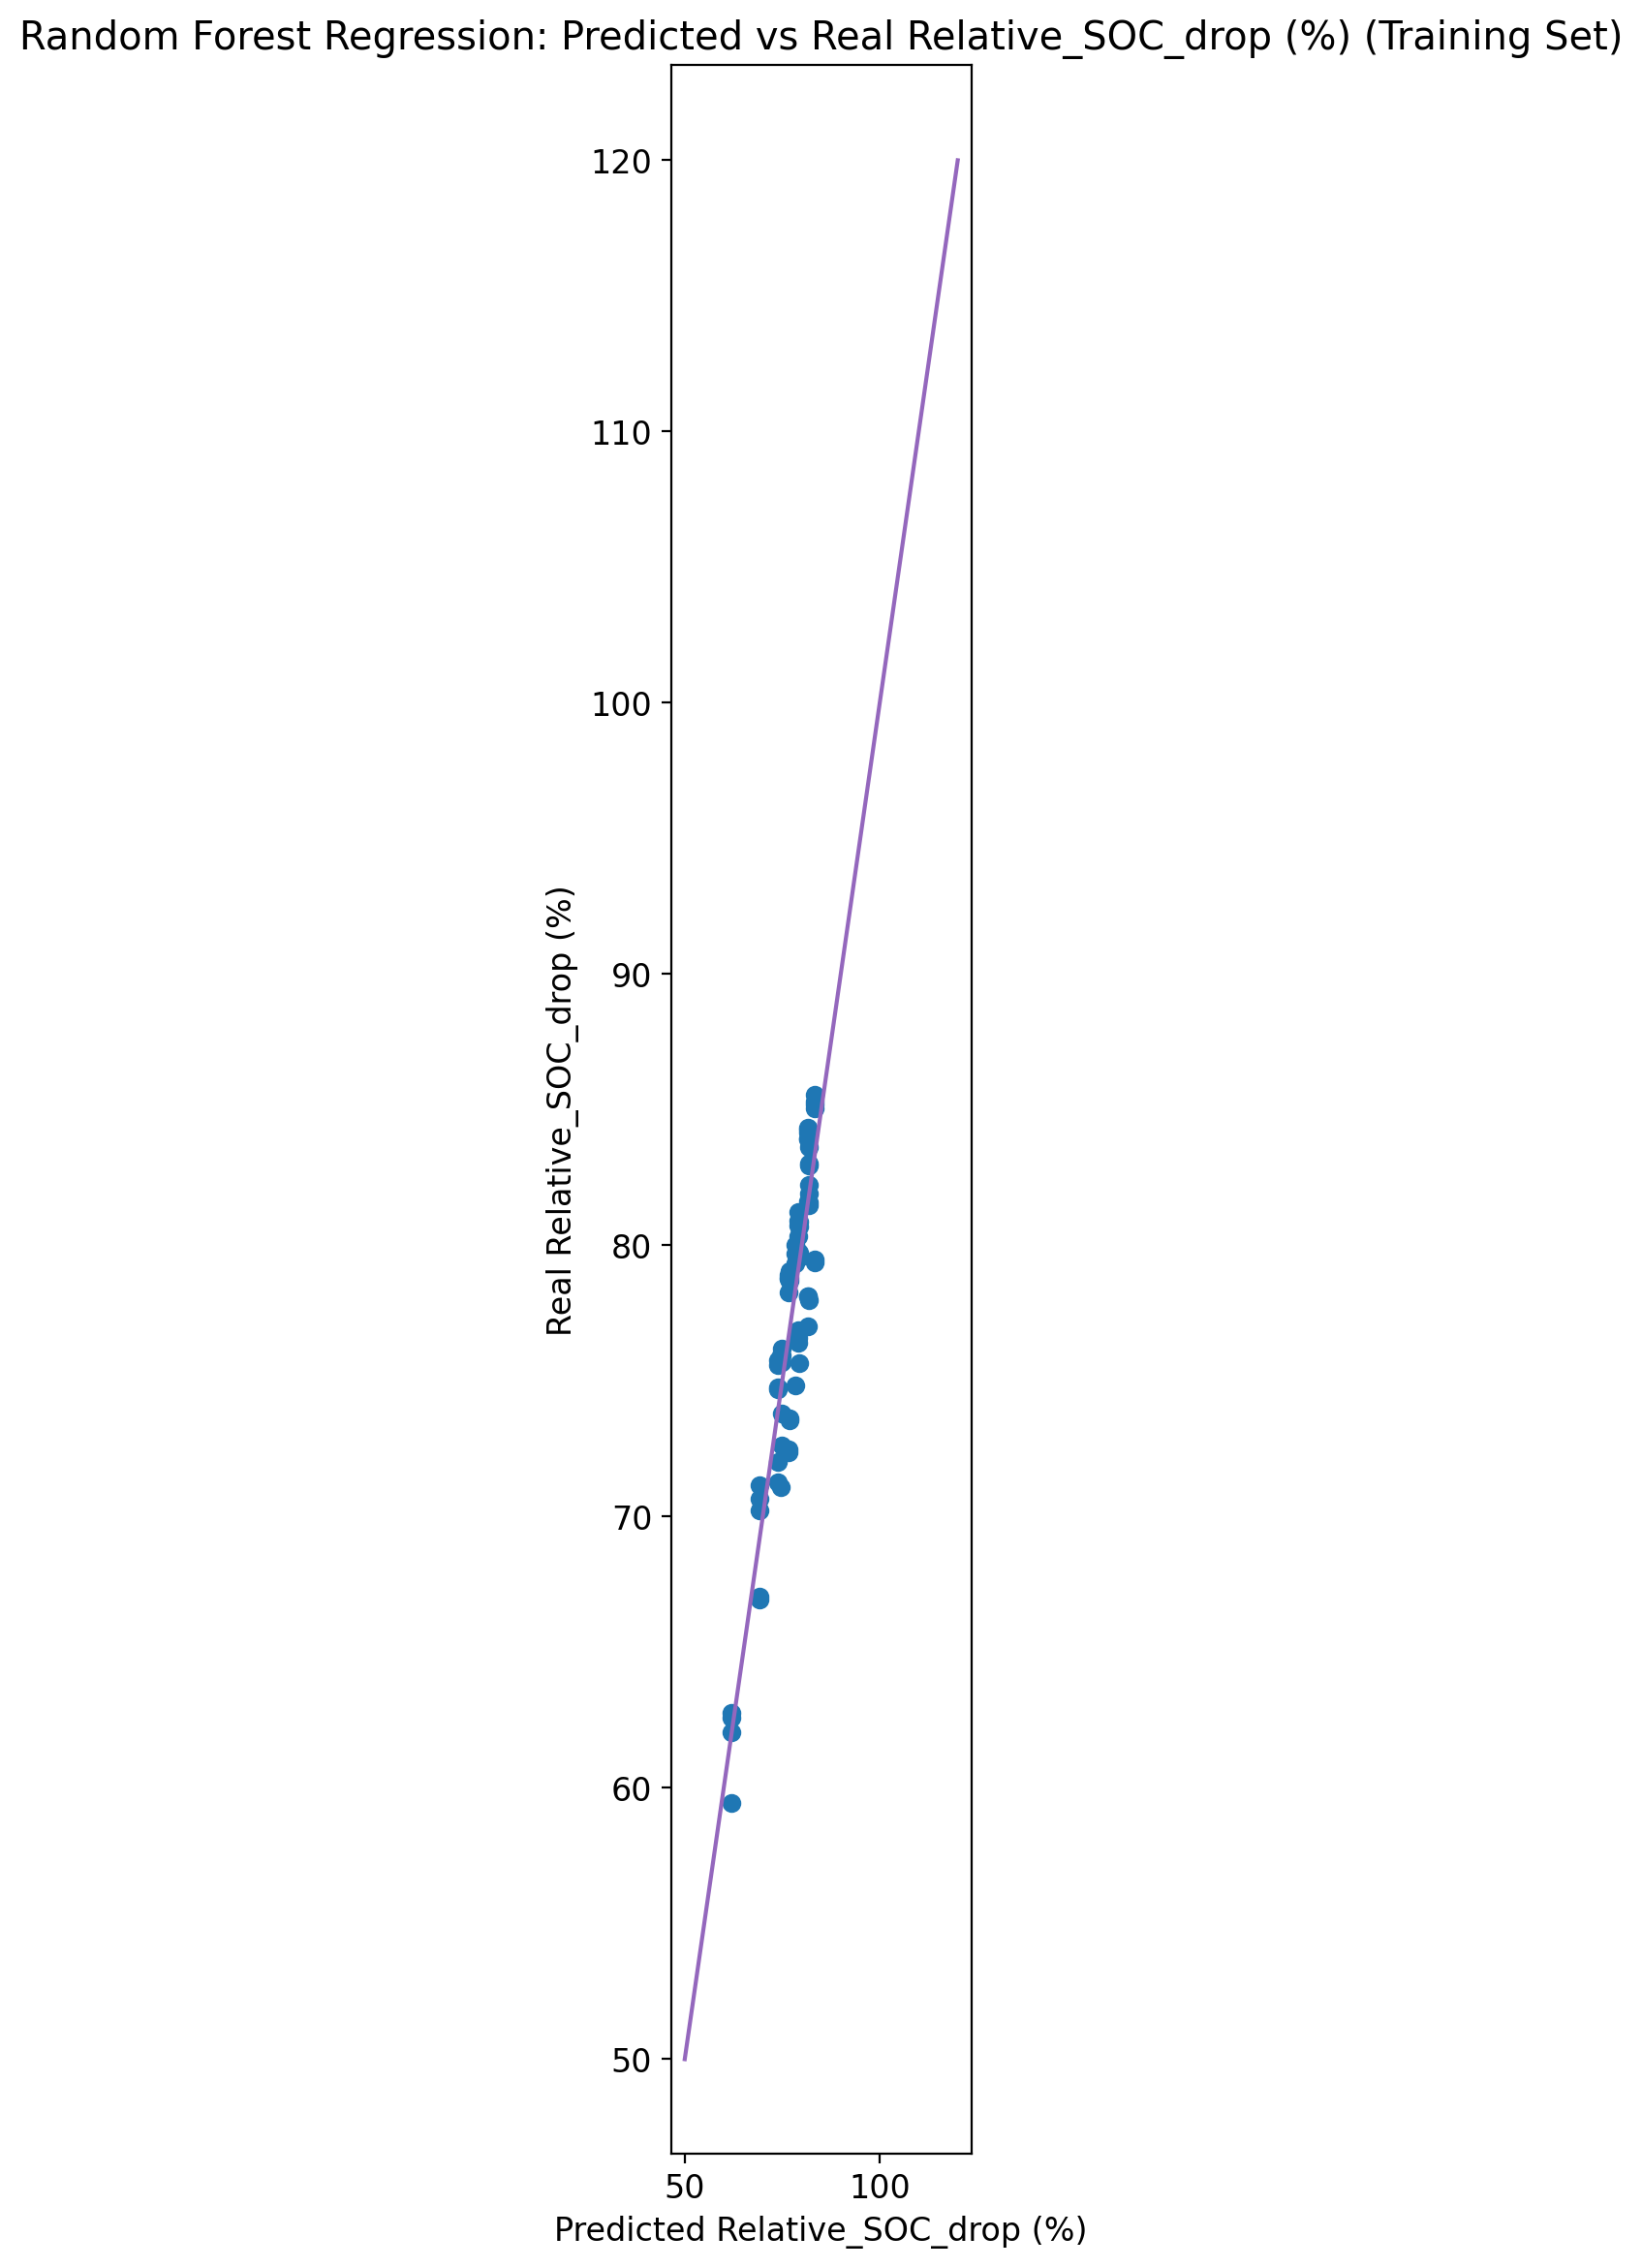

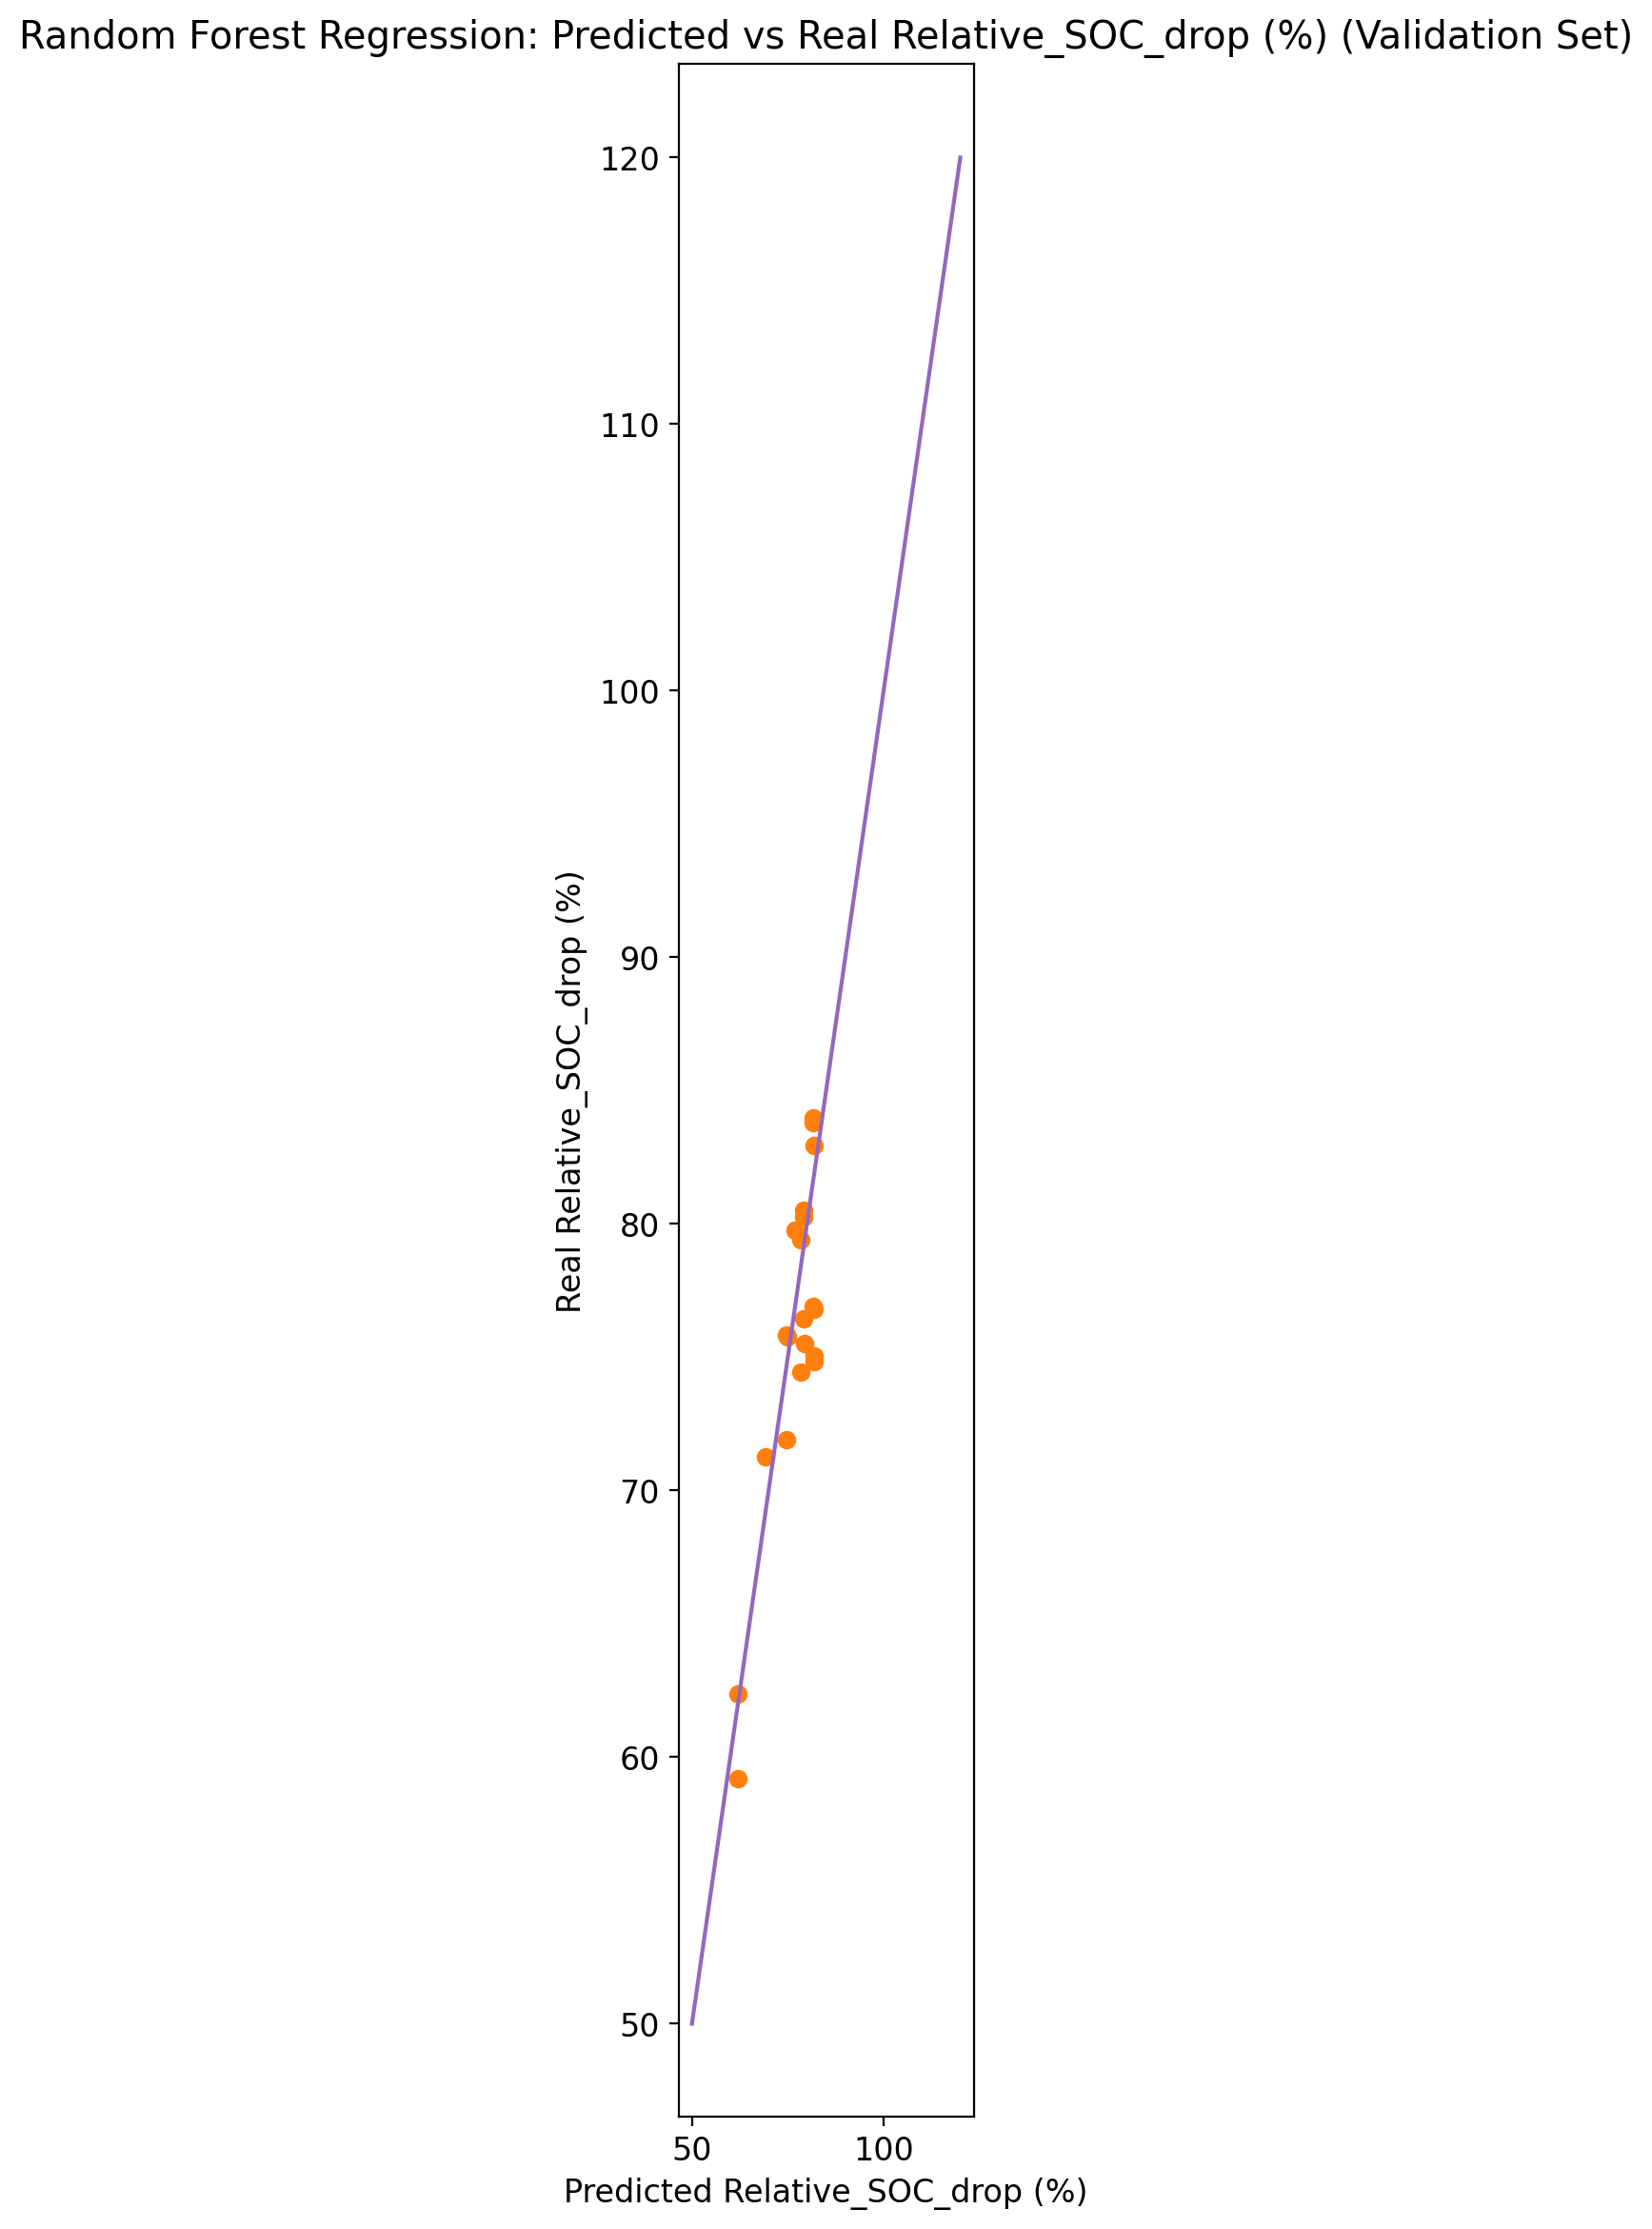

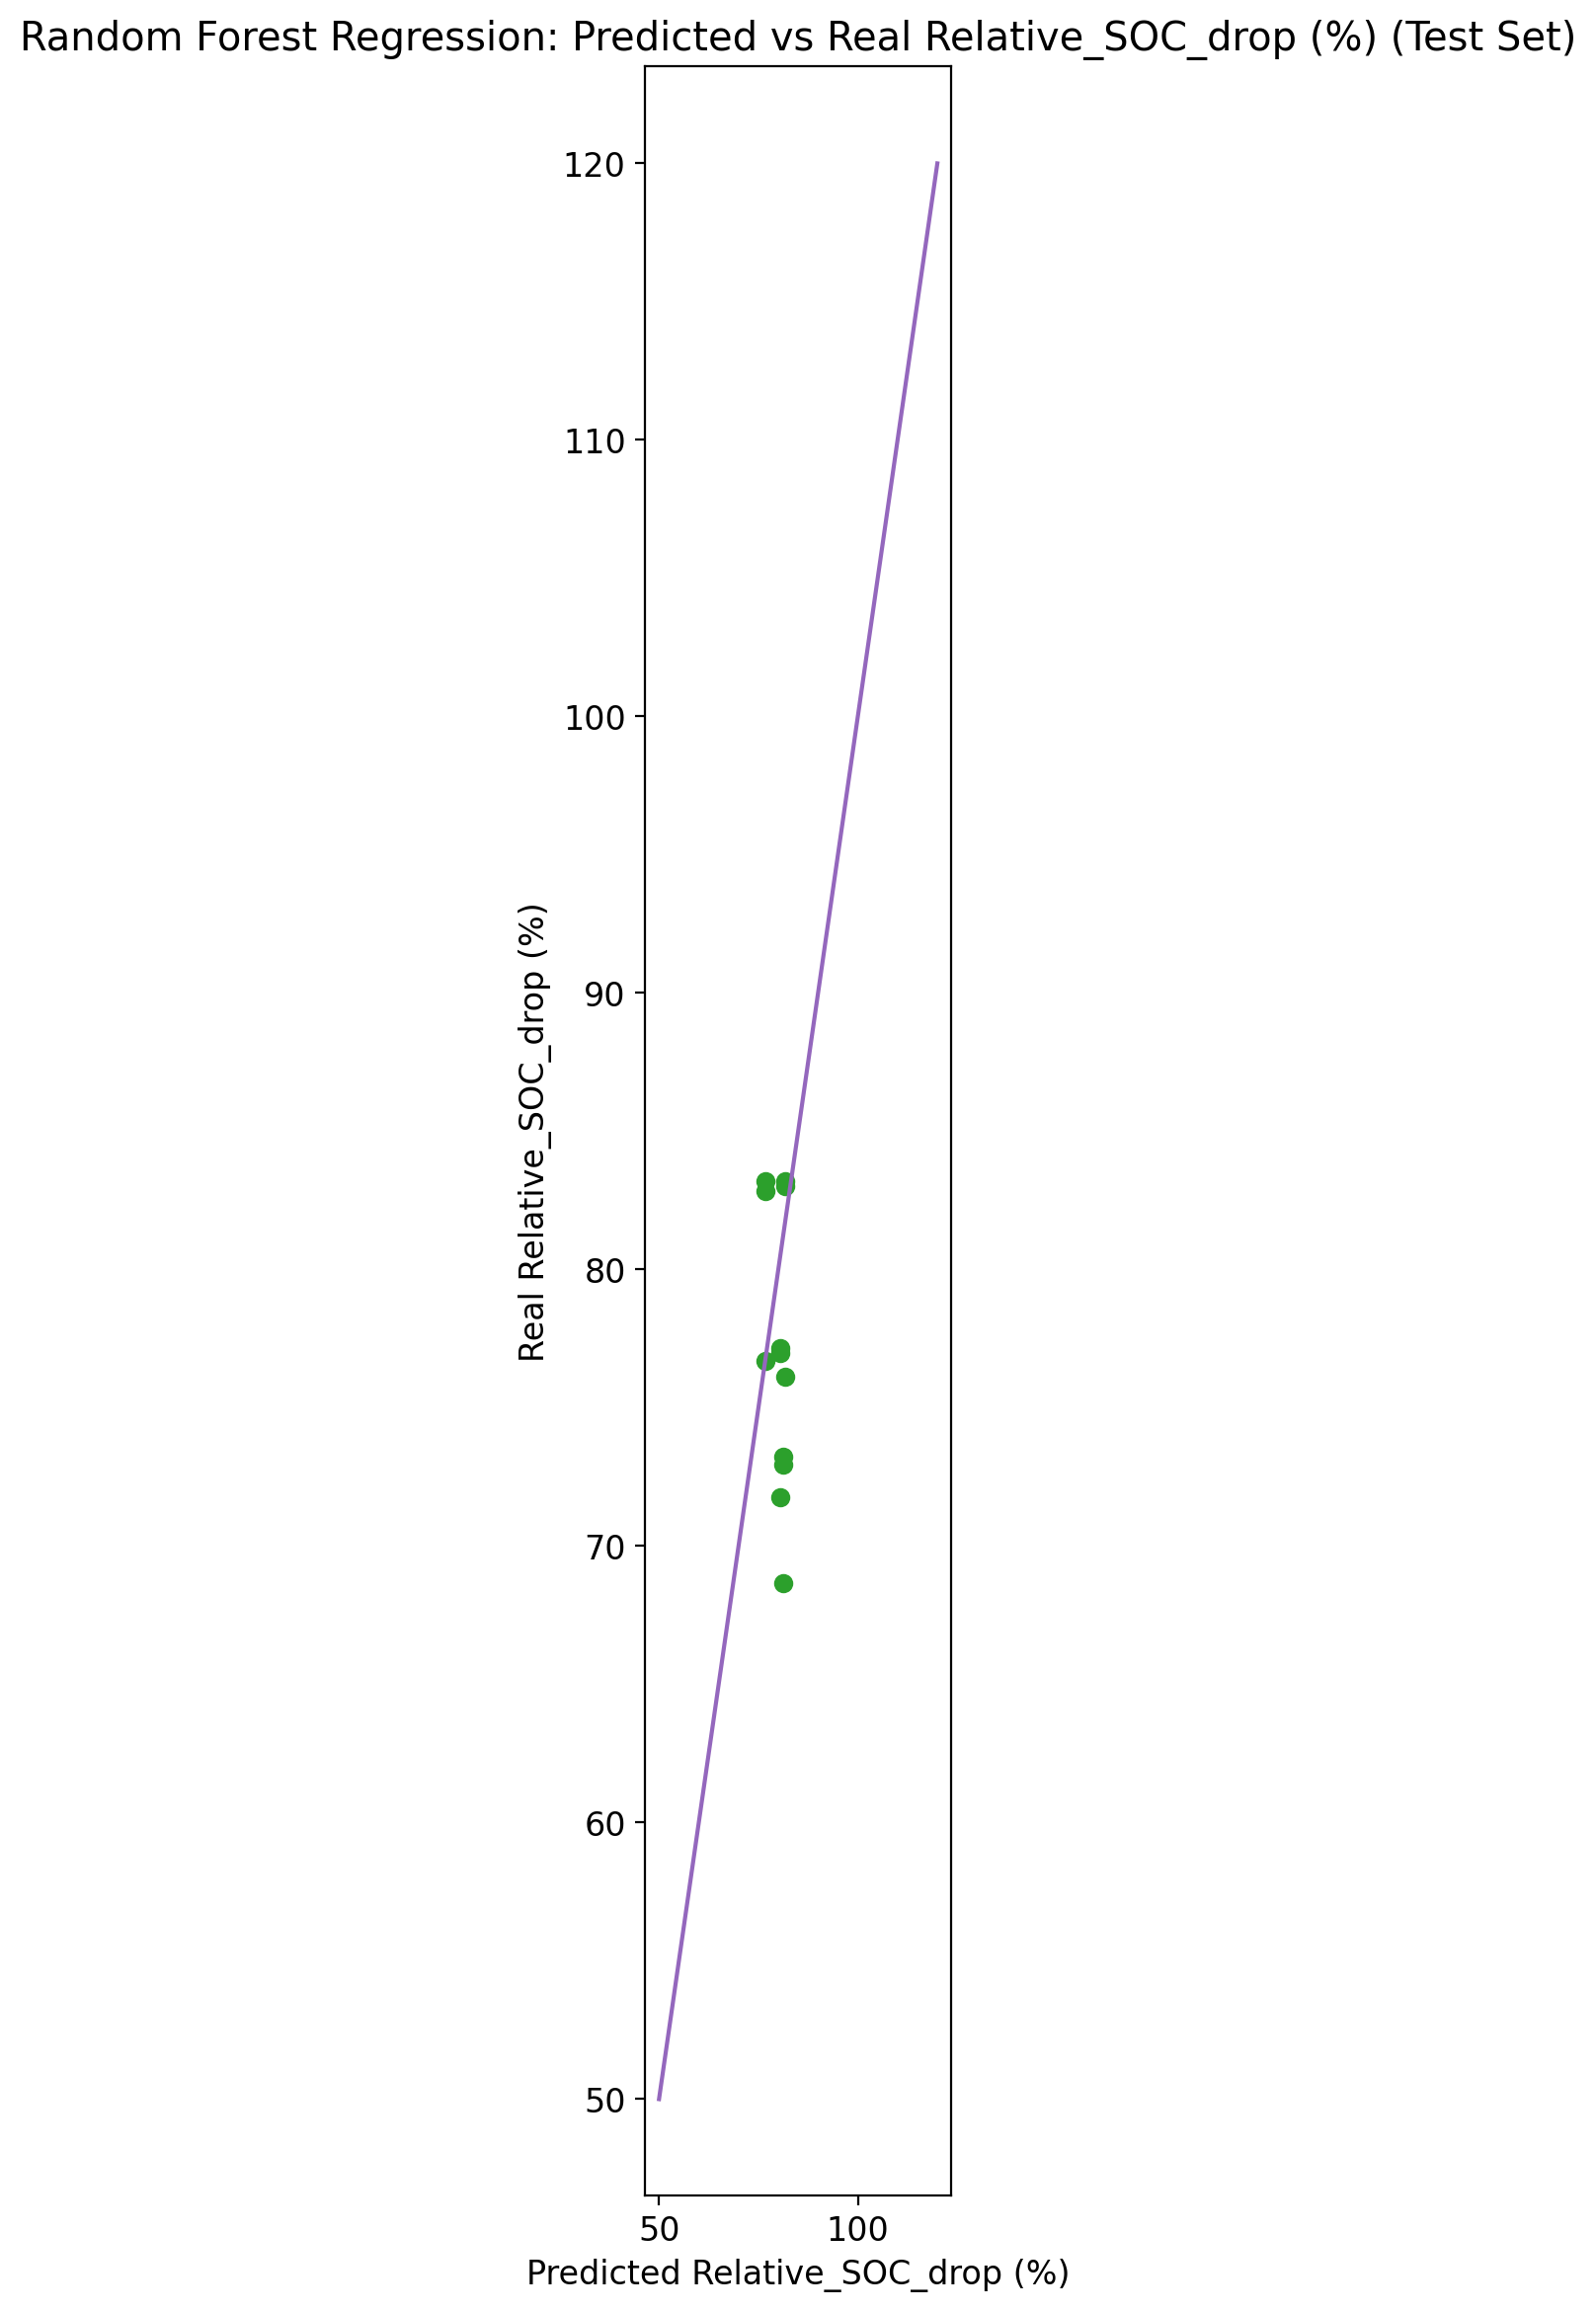

          time      speed
17  312.244898  24.285714
18  330.612245  24.880952
19  348.979592  25.476190
20  367.346939  22.630385
21  385.714286  23.650794
22  404.081633  24.671202
23  422.448980  25.518707
24  440.816327  25.242347
25  459.183673  24.965986
26  477.551020  24.689626
27  495.918367  24.413265
28  514.285714  24.136905
29  532.653061  23.860544
30  551.020408  23.584184
31  569.387755  23.307823
32  587.755102  23.031463
33  606.122449  22.755102
34  624.489796  22.478741
35  642.857143  22.202381
36  661.224490  21.984127
37  679.591837  22.579365
38  697.959184  23.174603
39  716.326531  23.769841
40  734.693878  23.979592
41  753.061224  24.092971
42  771.428571  24.206349
43  789.795918  24.319728
          time      speed
18  308.571429  21.825397
19  325.714286  22.698413
20  342.857143  23.571429
21  360.000000  24.444444
22  377.142857  24.325397
23  394.285714  24.206349
24  411.428571  24.087302
25  428.571429  23.968254
26  445.714286  23.849206
27  462.8571

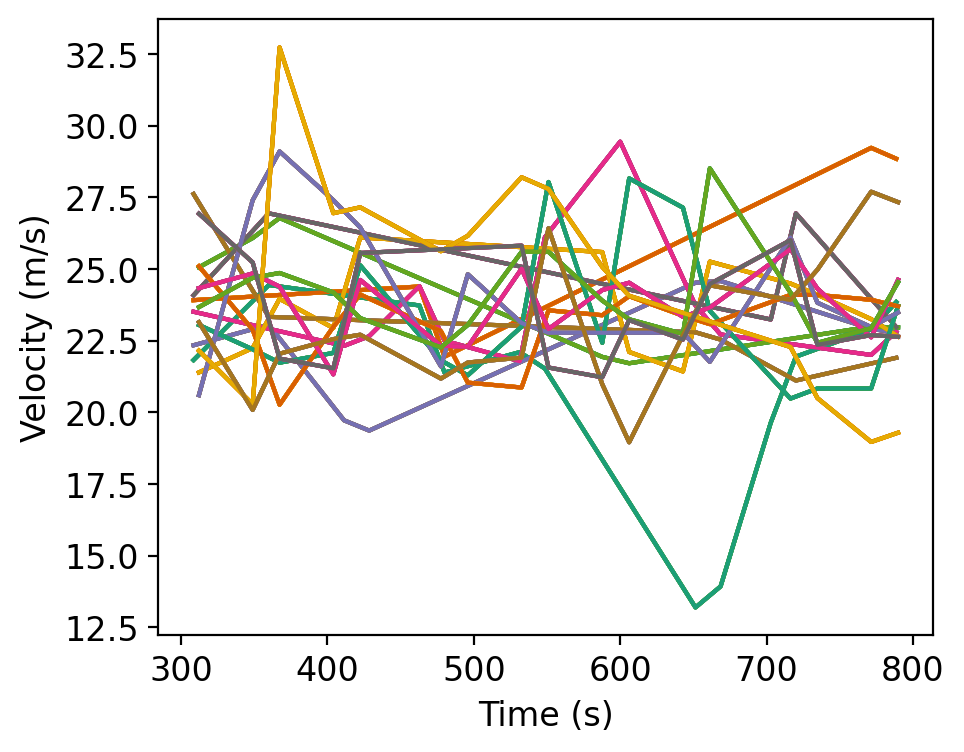

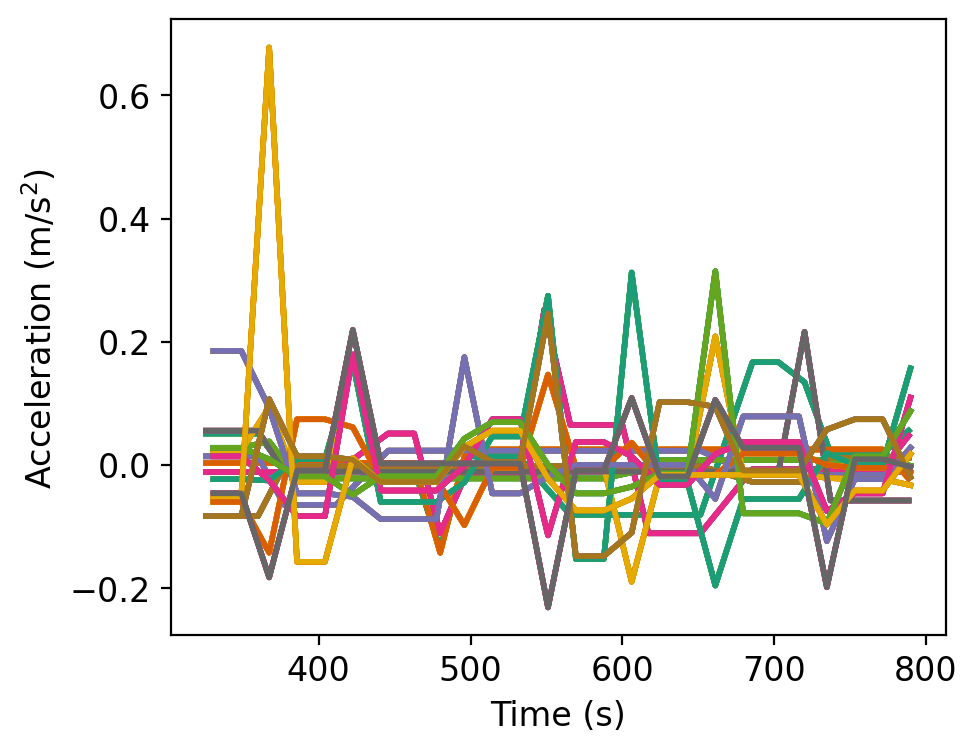

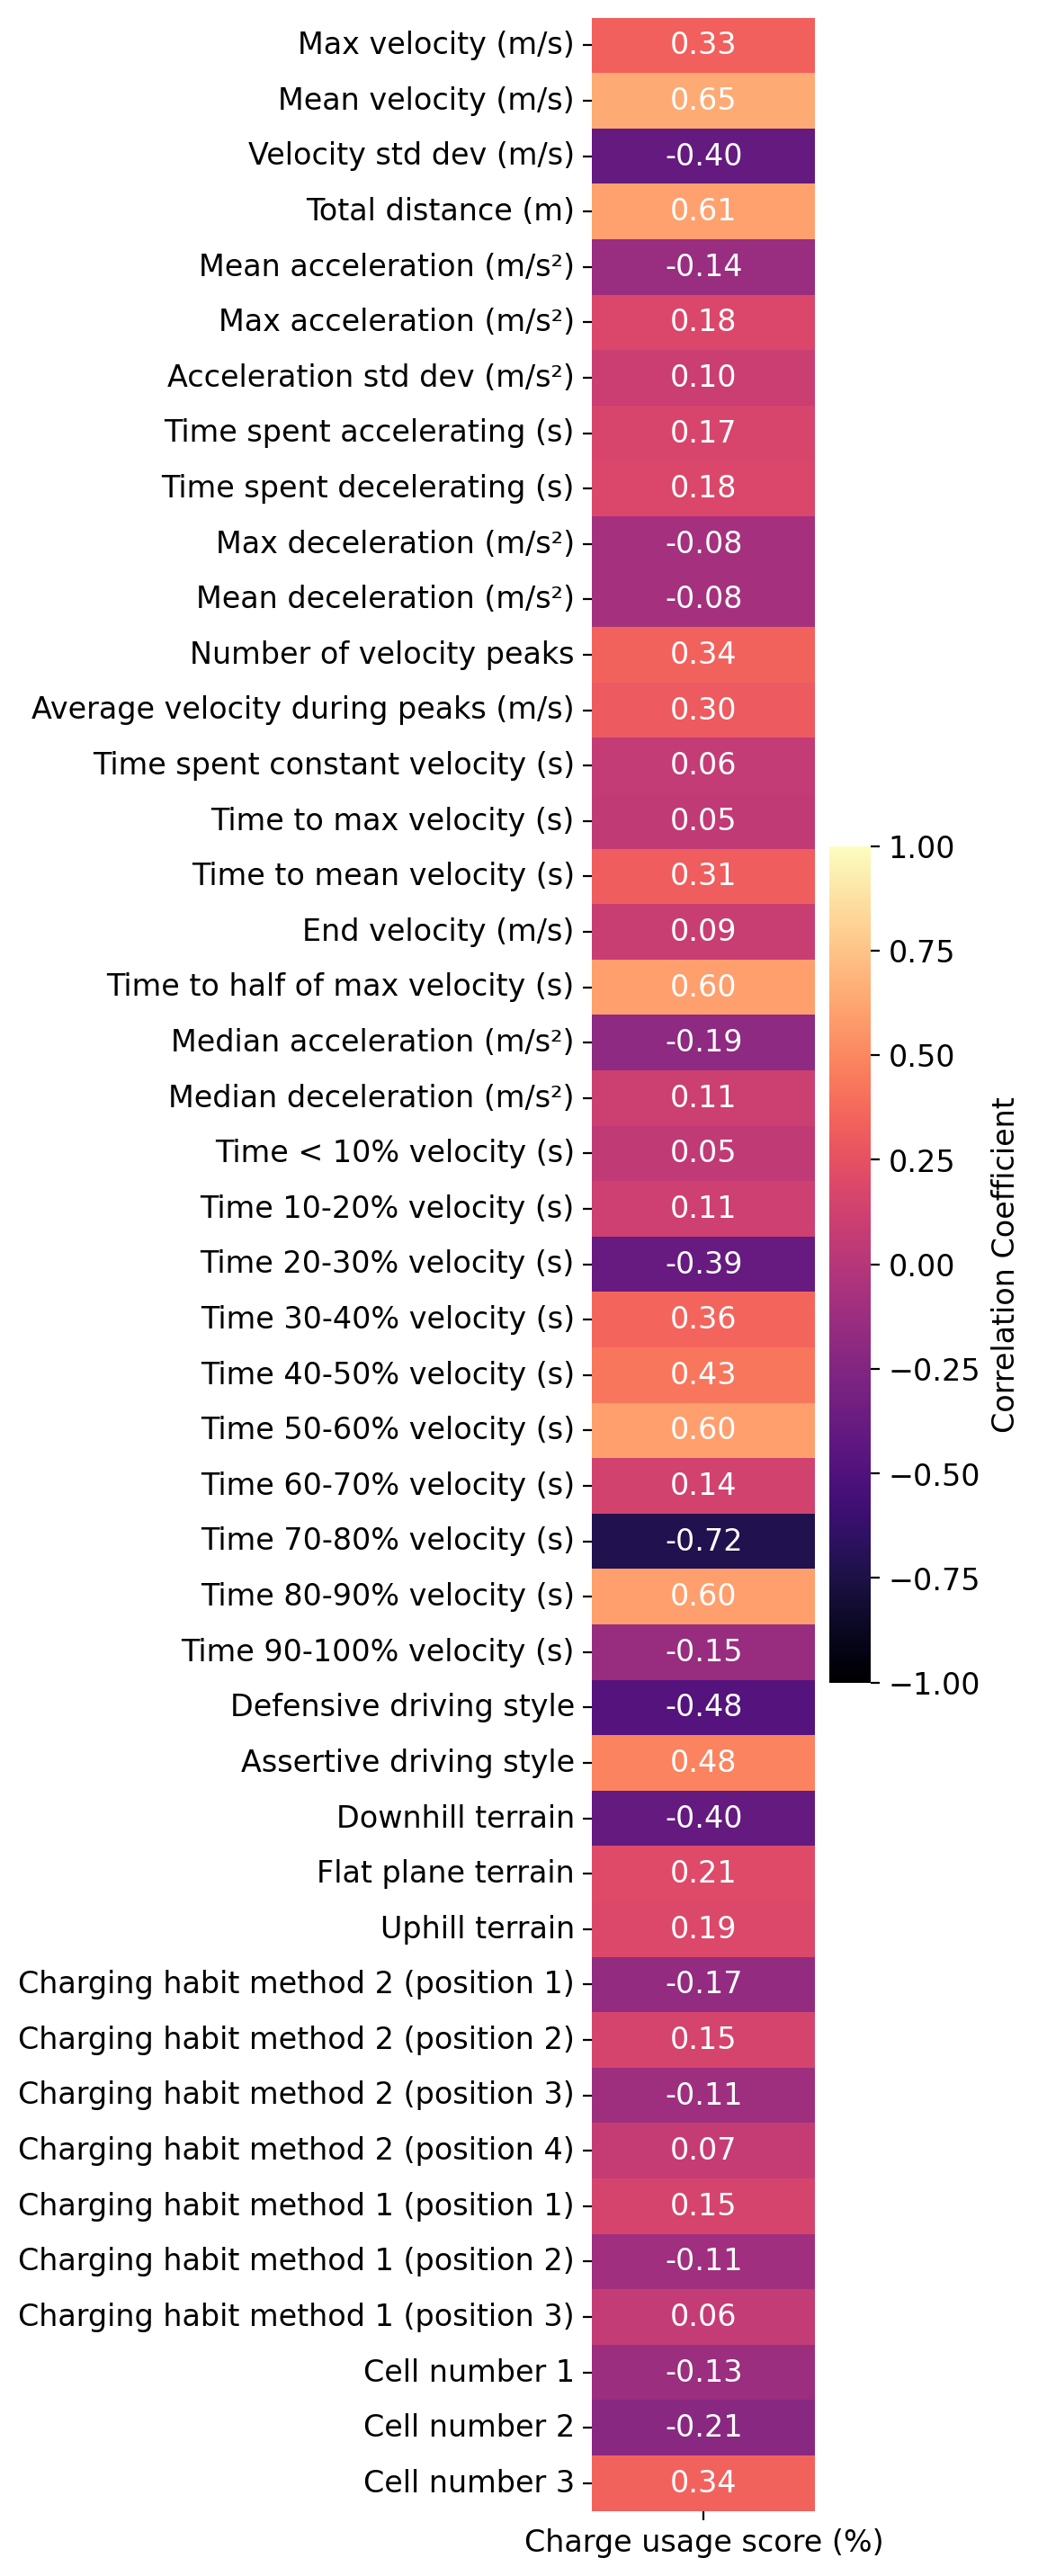

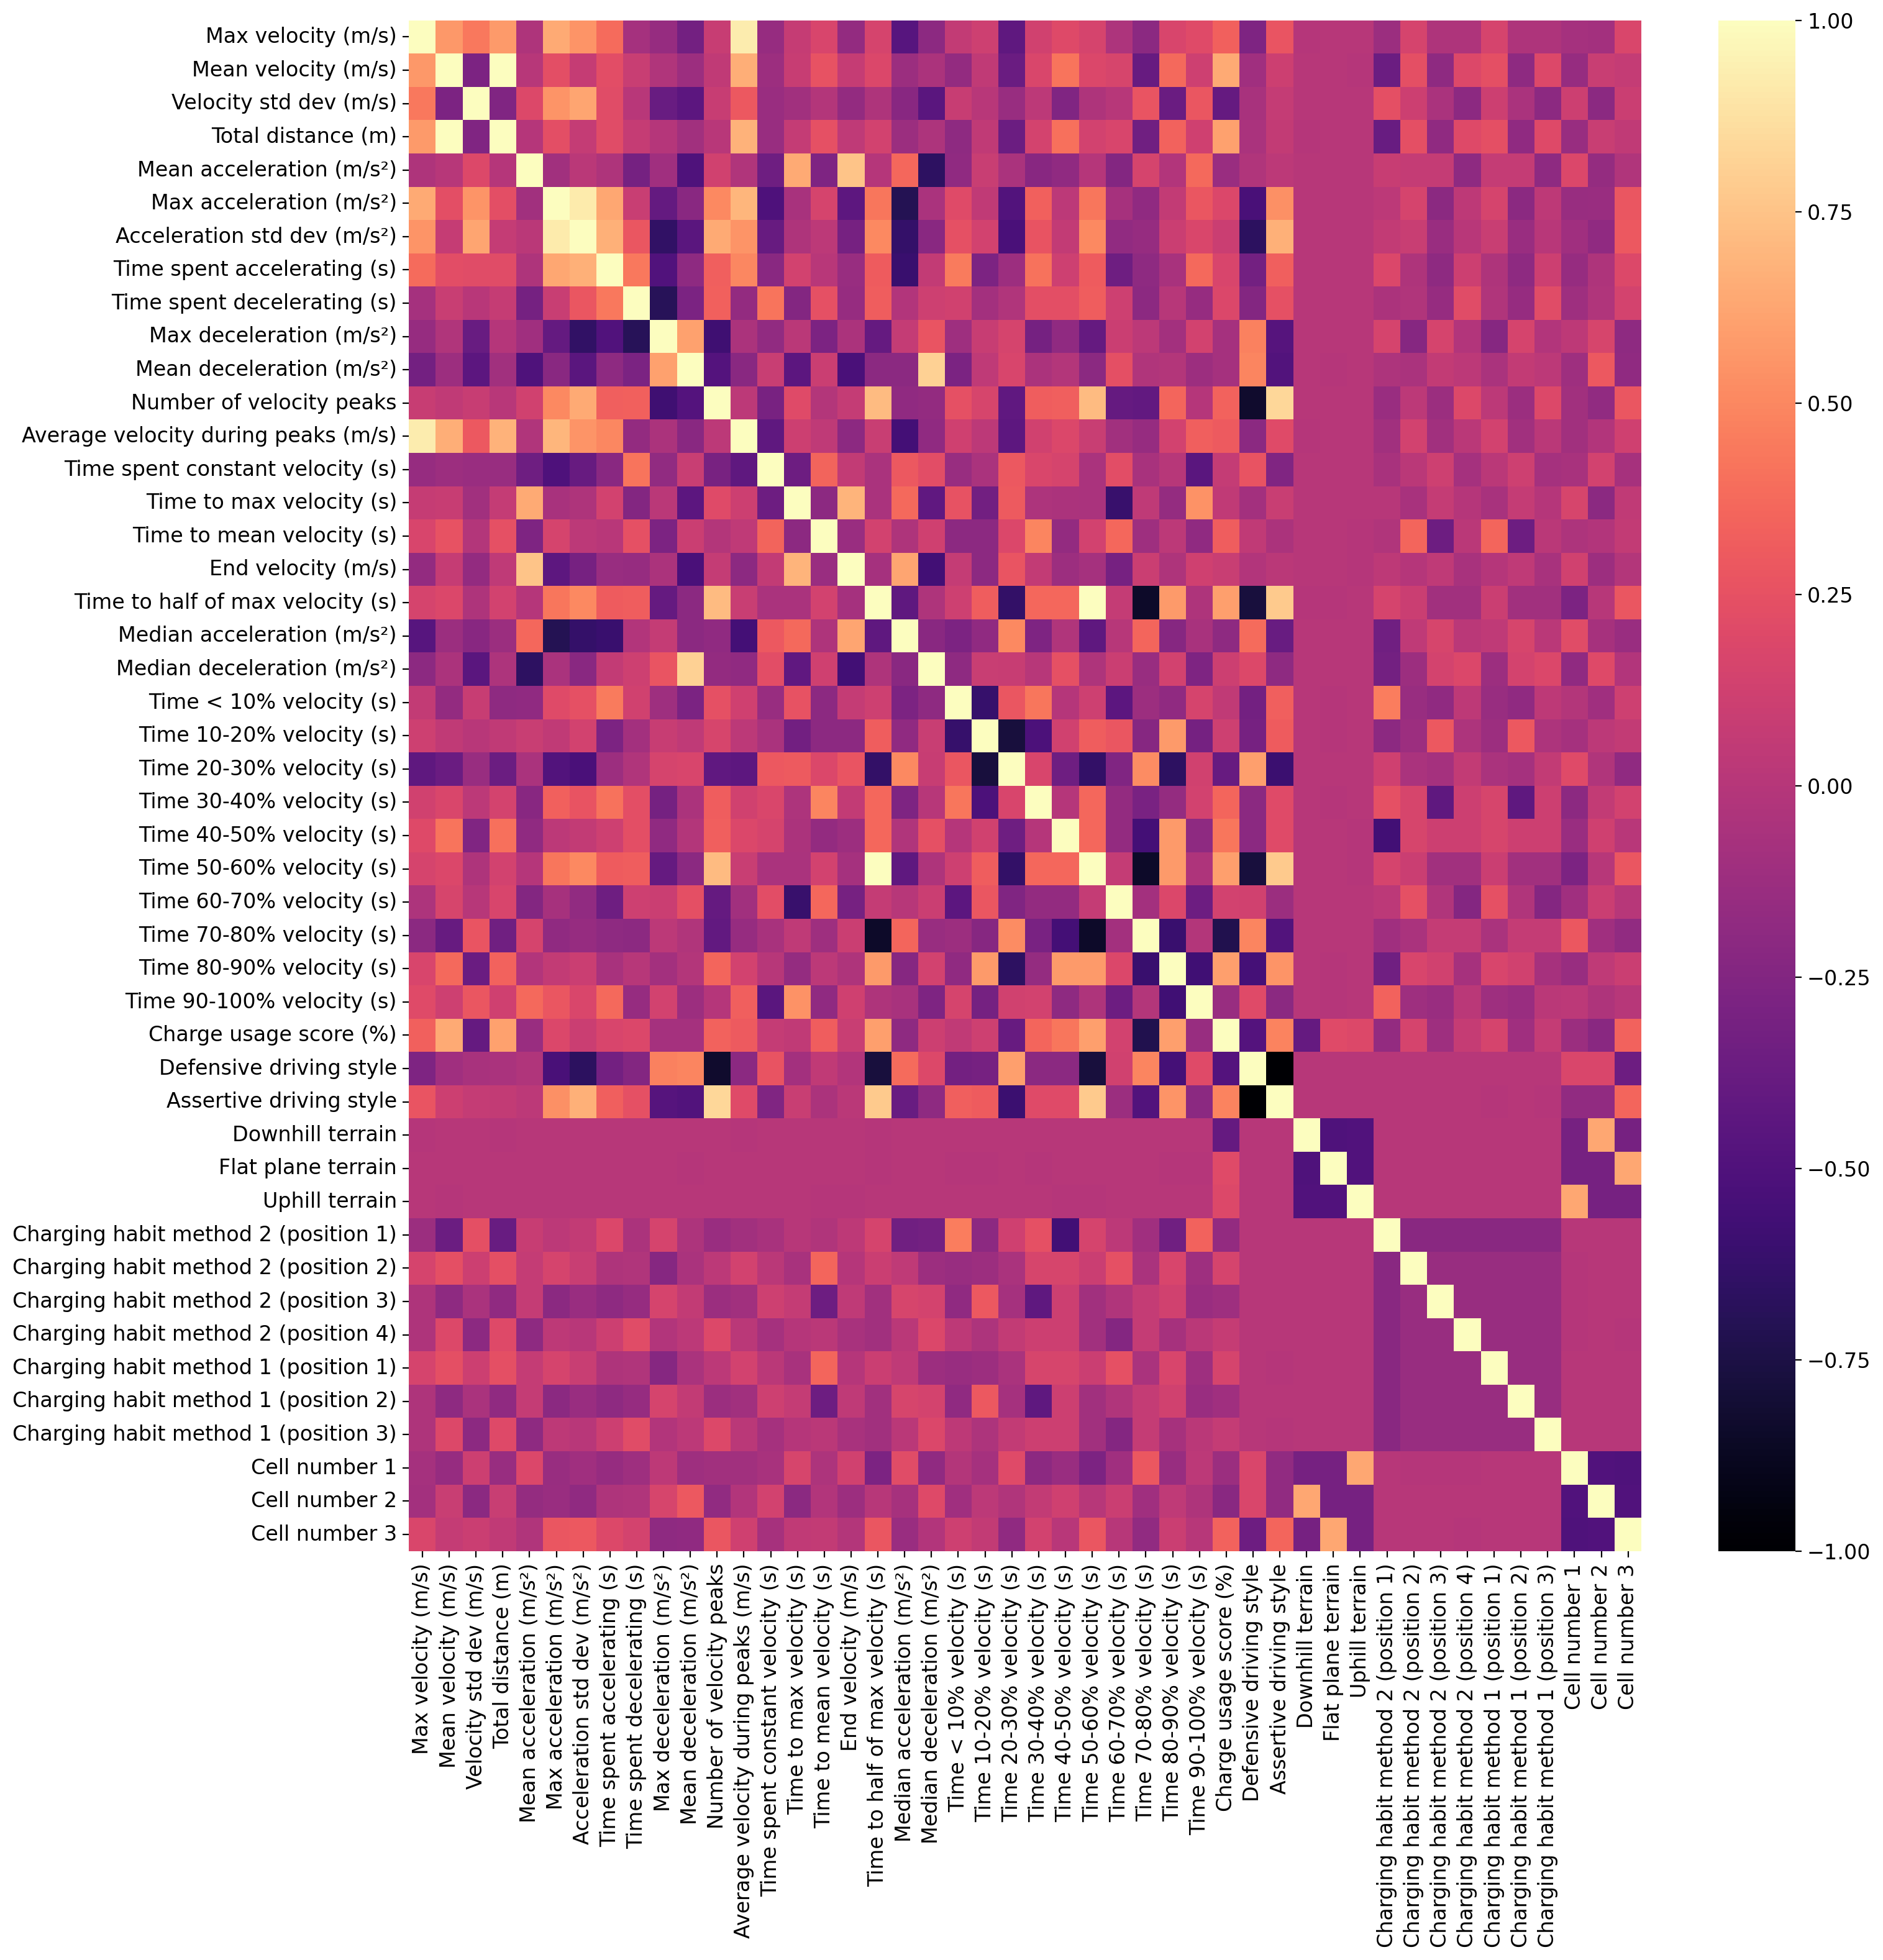

MAE: 3.8887609951692284
MAPE: 0.05227115873333247


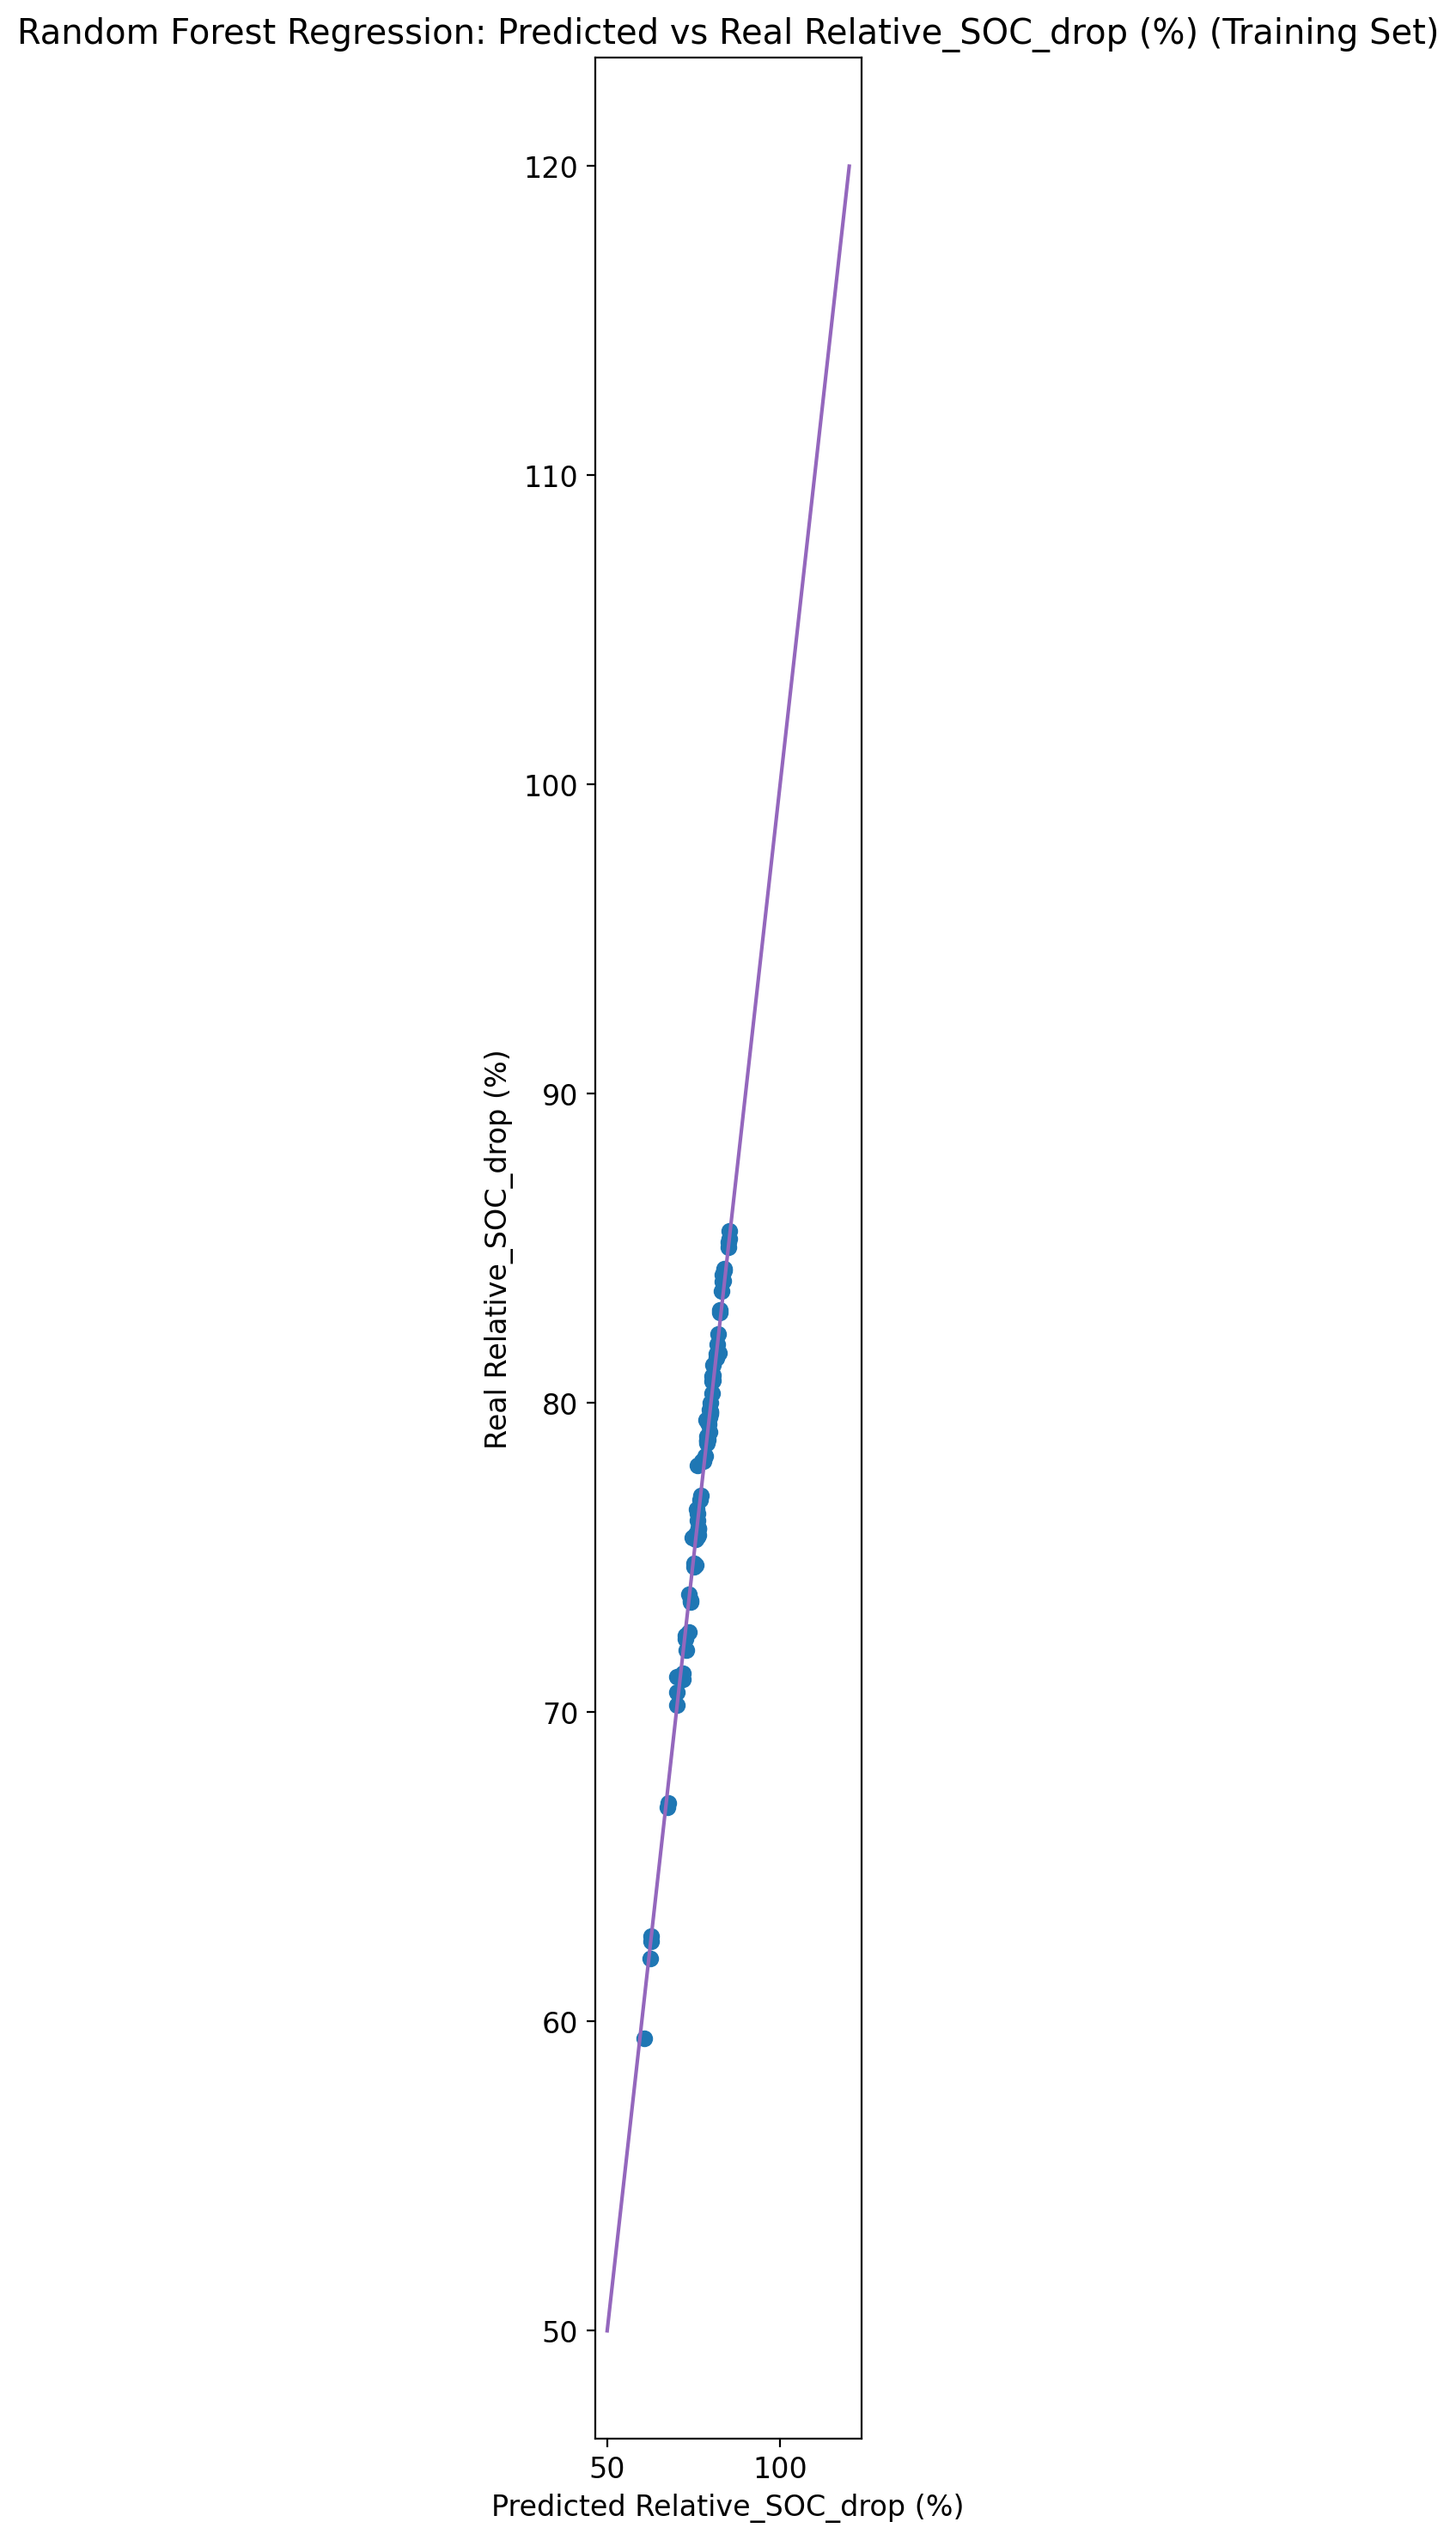

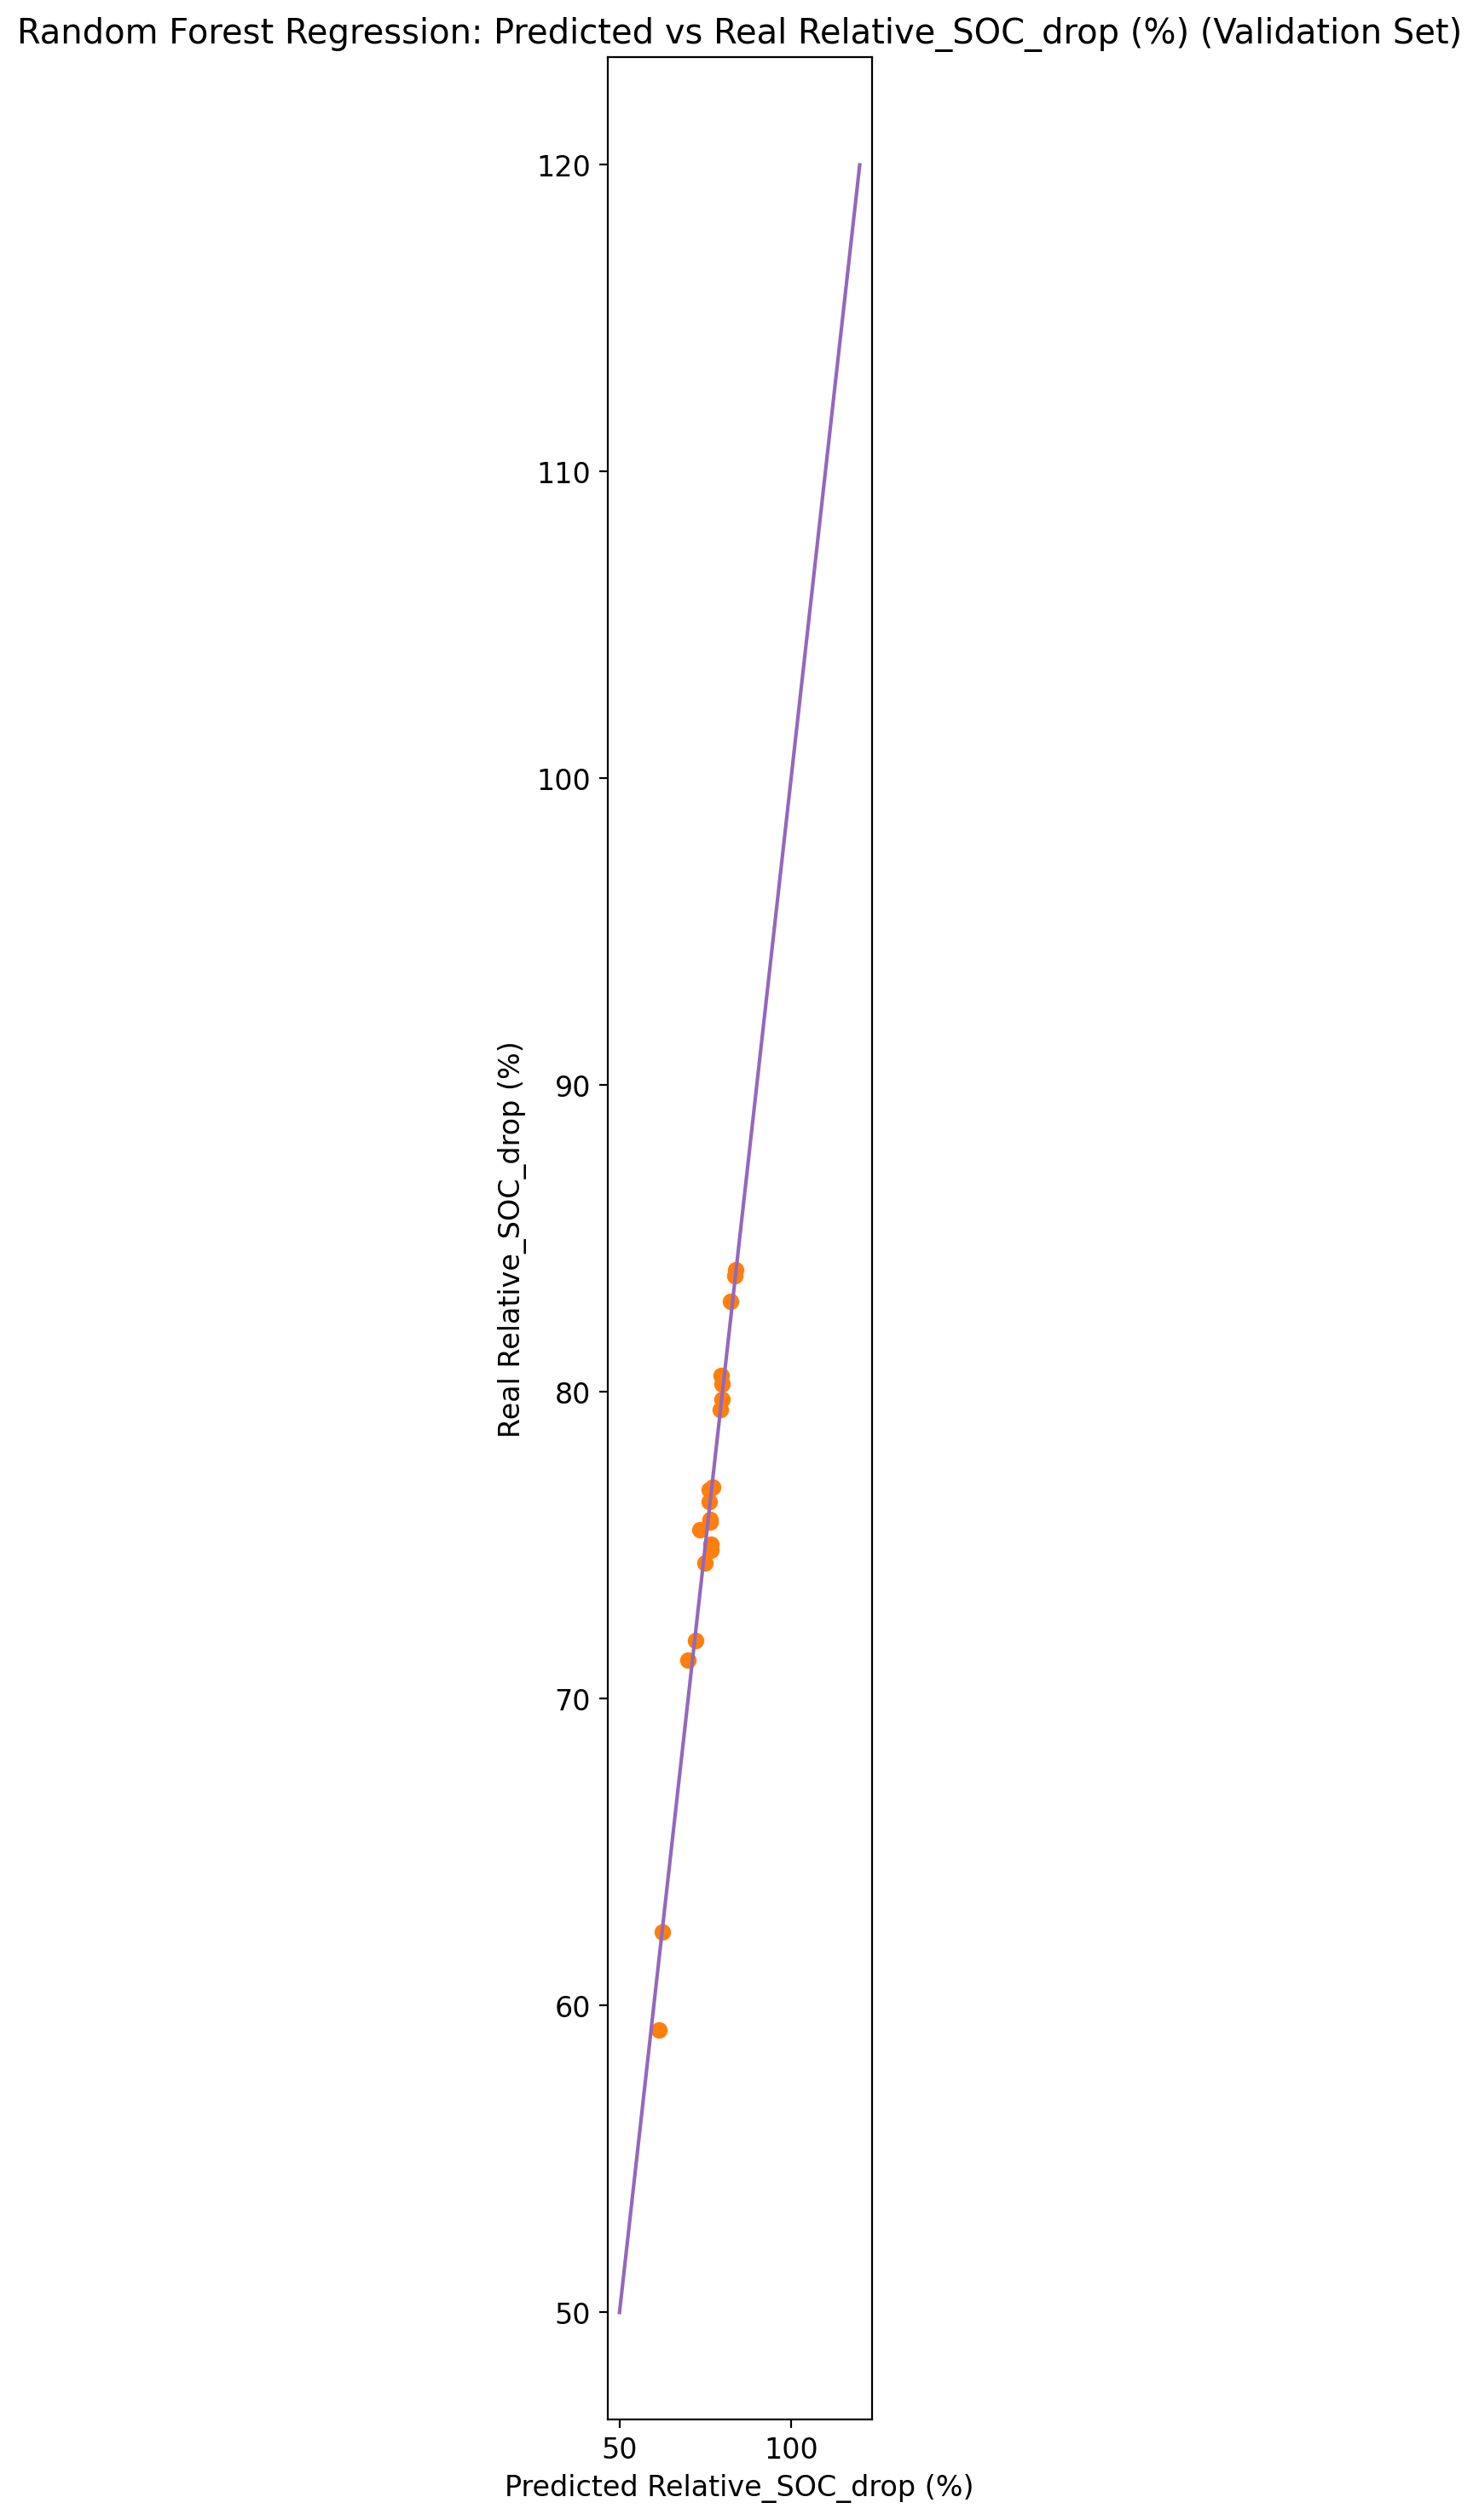

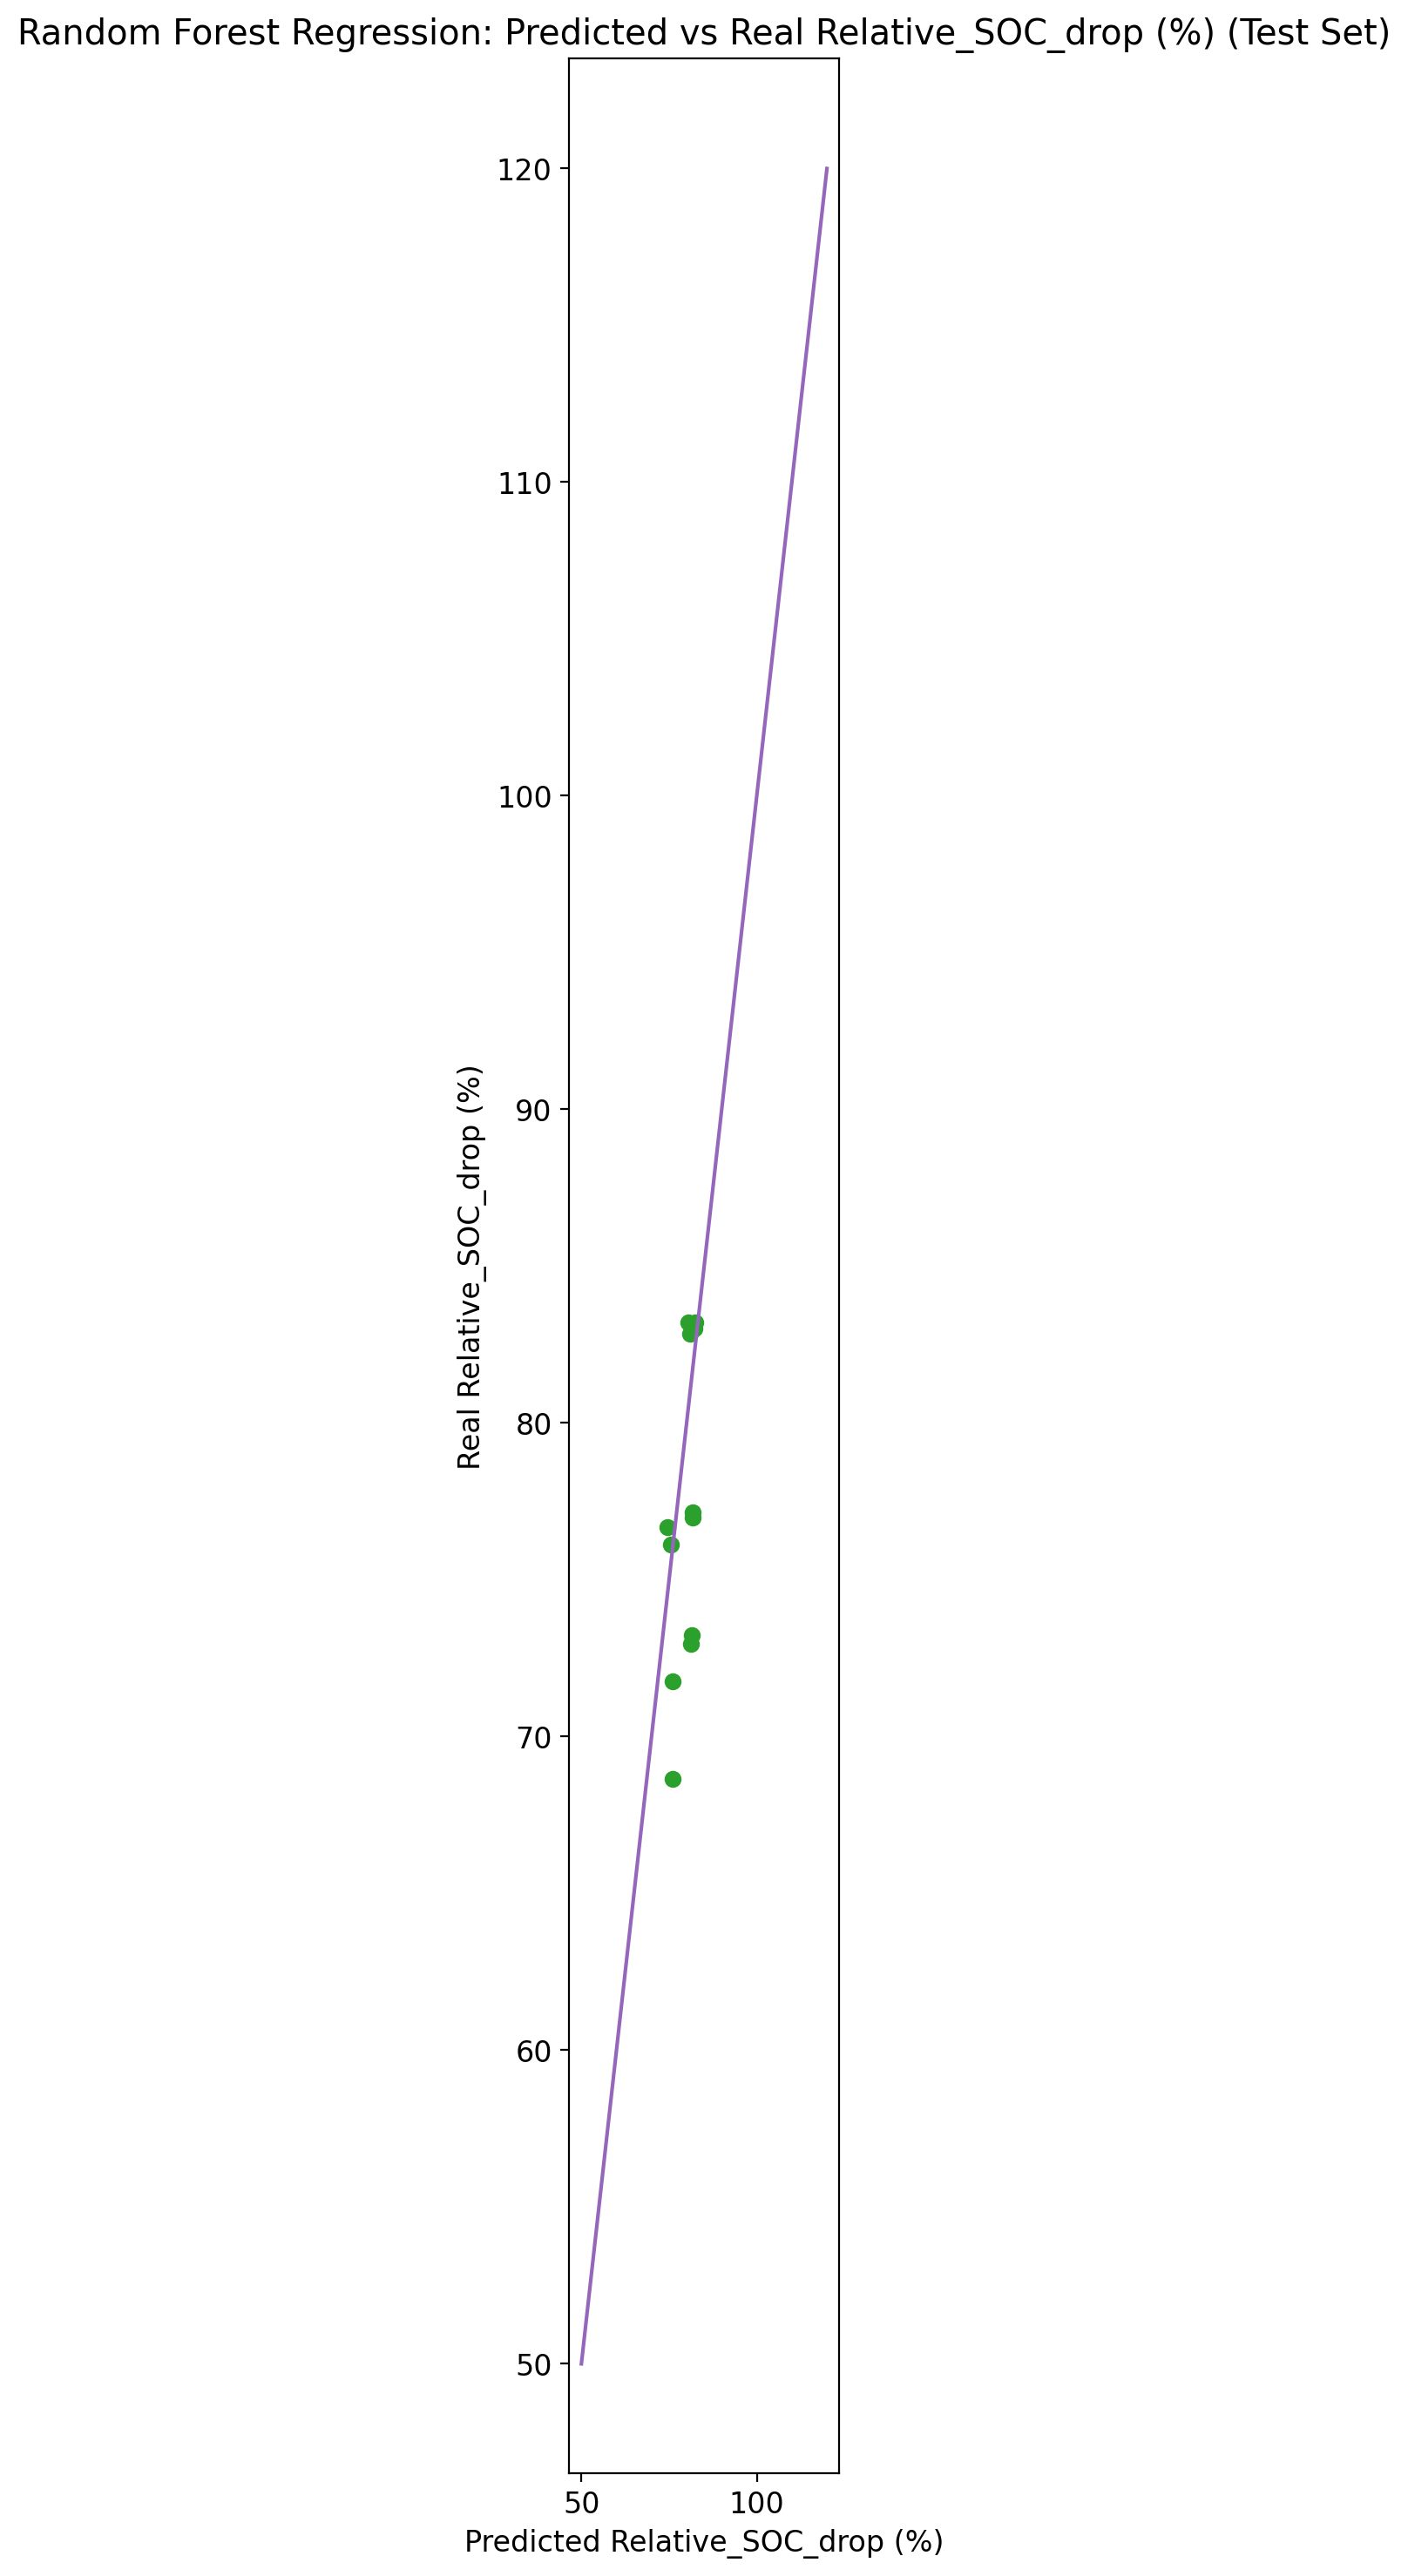

In [4]:
VEL_MODEL1 = VEL_MODELS / 'Velocity_Model-1_Relative_SOC_No_Iteration-Parity_plotting.ipynb'
VEL_MODEL2 = VEL_MODELS / 'Velocity_Model-2_Relative_SOC_No_Iteration-Parity_plotting.ipynb'

%run {VEL_MODEL1}
%run {VEL_MODEL2}

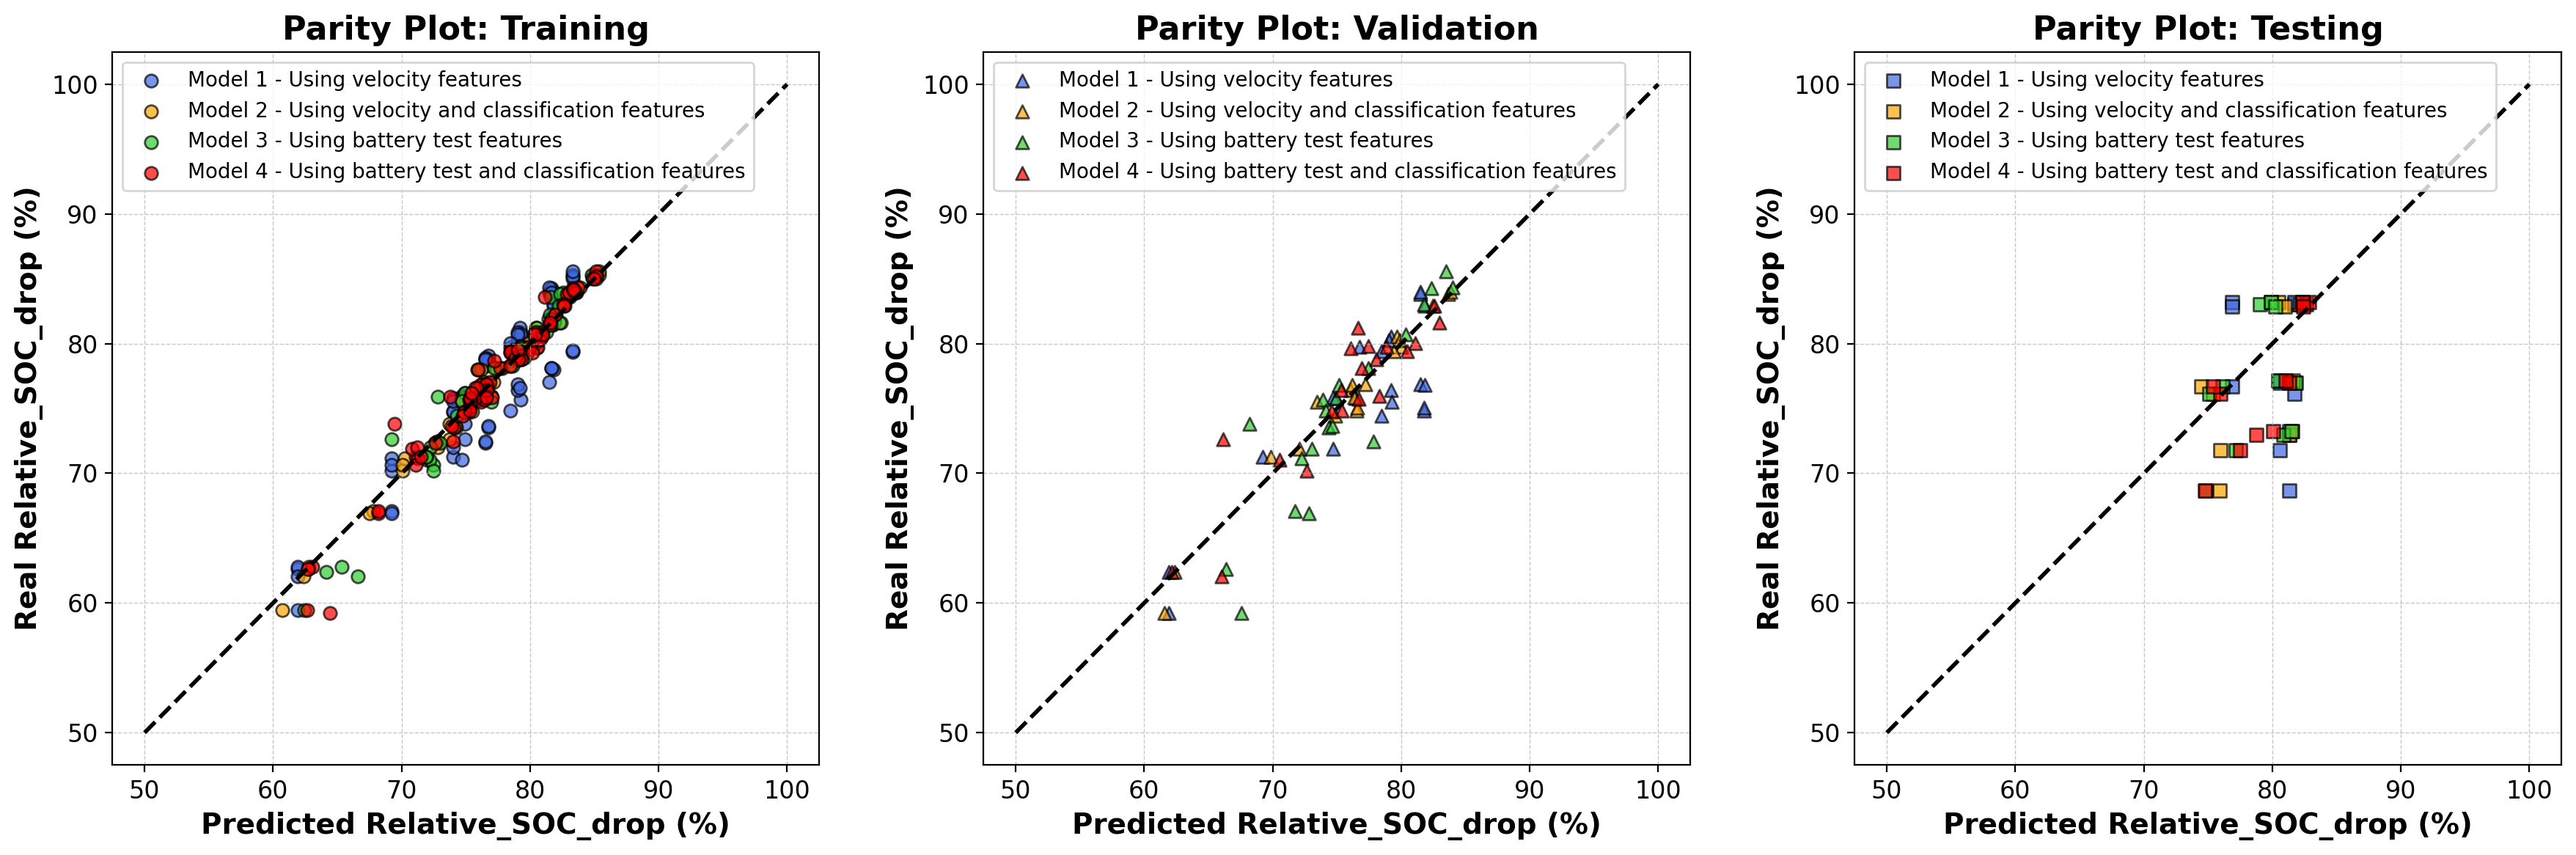

In [5]:
# Function to create combined parity plots for training, validation, and testing datasets respectively
def combined_parity_plots(model1_results, model2_results, model3_results, model4_results):
    # Unpack results from Model-1, Model-2, Model-3, and Model-4
    y_pred_train_1, y_train_1, y_pred_val_1, y_val_1, y_pred_test_1, y_test_1 = model1_results
    y_pred_train_2, y_train_2, y_pred_val_2, y_val_2, y_pred_test_2, y_test_2 = model2_results
    y_pred_train_3, y_train_3, y_pred_val_3, y_val_3, y_pred_test_3, y_test_3 = model3_results
    y_pred_train_4, y_train_4, y_pred_val_4, y_val_4, y_pred_test_4, y_test_4 = model4_results
    
    plt.figure(figsize=(18, 6))
    
    # Create subplots for training, validation, and testing
    for i, (pred1, real1, pred2, real2, pred3, real3, pred4, real4, title, marker, label) in enumerate([
        (y_pred_train_1, y_train_1, y_pred_train_2, y_train_2, y_pred_train_3, y_train_3, y_pred_train_4, y_train_4, 'Training', 'o', 'Training'),  # Circle for training
        (y_pred_val_1, y_val_1, y_pred_val_2, y_val_2, y_pred_val_3, y_val_3, y_pred_val_4, y_val_4, 'Validation', '^', 'Validation'),  # Triangle for validation
        (y_pred_test_1, y_test_1, y_pred_test_2, y_test_2, y_pred_test_3, y_test_3, y_pred_test_4, y_test_4, 'Testing', 's', 'Testing')  # Square for testing
    ]):
        plt.subplot(1, 3, i + 1) # 3 plots
        
        # Model-1 plots
        plt.scatter(pred1, real1, color='royalblue', marker=marker, s=40, edgecolor='black', label='Model 1 - Using velocity features', alpha=0.7)

        # Model-2 plots
        plt.scatter(pred2, real2, color='orange', marker=marker, s=40, edgecolor='black', label='Model 2 - Using velocity and classification features', alpha=0.7)
        
        # Model-3 plots
        plt.scatter(pred3, real3, color='limegreen', marker=marker, s=40, edgecolor='black', label='Model 3 - Using battery test features', alpha=0.7)
        
        # Model-4 plots
        plt.scatter(pred4, real4, color='red', marker=marker, s=40, edgecolor='black', label='Model 4 - Using battery test and classification features', alpha=0.7)
        
        # Diagonal reference line
        plt.plot([50, 100], [50, 100], color='black', linestyle='--', linewidth=2)
        
        # Labels and title
        plt.xlabel('Predicted Relative_SOC_drop (%)', fontsize=14, fontweight='bold')
        plt.ylabel('Real Relative_SOC_drop (%)', fontsize=14, fontweight='bold')
        plt.title(f'Parity Plot: {title}', fontsize=16, fontweight='bold')
        
        # Add a subtle grid for better readability
        plt.grid(True, which='both', linestyle='--', linewidth=0.5, alpha=0.7)
        
        # Customize ticks
        plt.xticks(fontsize=12)
        plt.yticks(fontsize=12)

        # Adding legends for all subplots
        plt.legend(loc='upper left', fontsize=10, frameon=True, shadow=False)
        
    # Adjust layout
    plt.tight_layout()
    # plt.savefig('plot6.png', format='png', dpi=1000)
    # Show the combined plot
    plt.show()

# New results for Model-3 & 4
data_3 = np.load(MISC_DIR / 'predictions_and_labels_for_battery_data.npz')
model_3_results = (
    data_3['y_pred_train_3'], data_3['y_train_3'],
    data_3['y_pred_val_3'], data_3['y_val_3'],
    data_3['y_pred_test_3'], data_3['y_test_3']
)
data_4 = np.load(MISC_DIR / 'predictions_and_labels_for_battery_data+classification.npz')
model_4_results = (
    data_4['y_pred_train_4'], data_4['y_train_4'],
    data_4['y_pred_val_4'], data_4['y_val_4'],
    data_4['y_pred_test_4'], data_4['y_test_4']
)

# Call the combined parity plots function with Model-3
combined_parity_plots(model_1_results, model_2_results, model_3_results, model_4_results)

## Final parity plotting

In [6]:
data_3 = np.load(MISC_DIR / 'predictions_and_labels_for_battery_data.npz')
model_3_results = (
    data_3['y_pred_train_3'], data_3['y_train_3'],
    data_3['y_pred_val_3'], data_3['y_val_3'],
    data_3['y_pred_test_3'], data_3['y_test_3']
)
data_4 = np.load(MISC_DIR / 'predictions_and_labels_for_battery_data+classification.npz')
model_4_results = (
    data_4['y_pred_train_4'], data_4['y_train_4'],
    data_4['y_pred_val_4'], data_4['y_val_4'],
    data_4['y_pred_test_4'], data_4['y_test_4'])

y_pred_train_1, y_train_1, y_pred_val_1, y_val_1, y_pred_test_1, y_test_1 = model_1_results
y_pred_train_2, y_train_2, y_pred_val_2, y_val_2, y_pred_test_2, y_test_2 = model_2_results

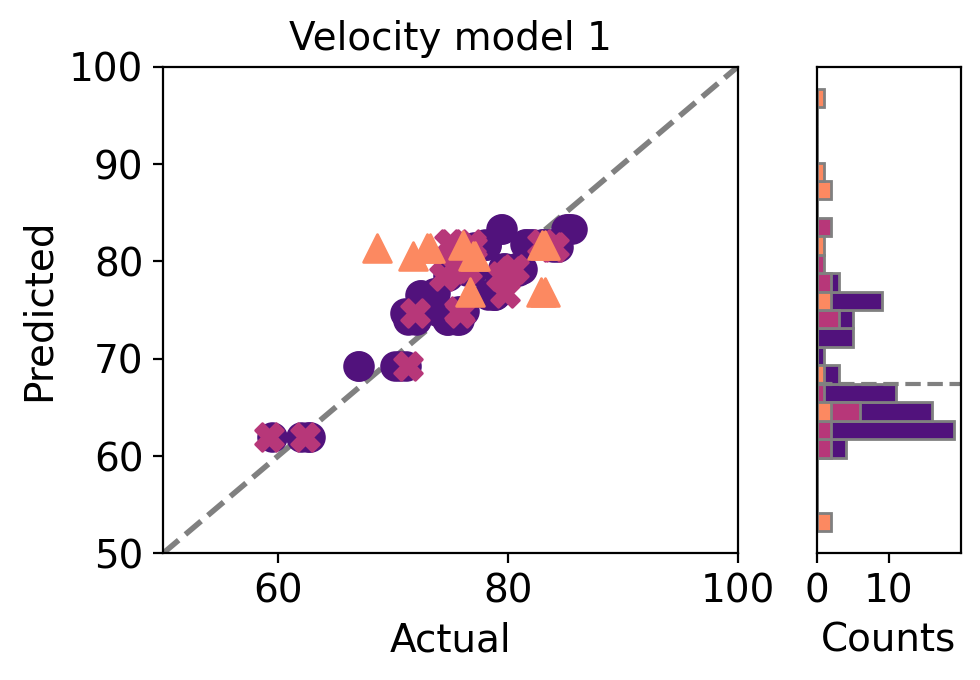

In [26]:
sns.reset_orig()
plt.rcdefaults()
set_matplotlib_formats('retina')
plt.rcParams['figure.figsize'] = (5, 3.5) 

colors = sns.color_palette("magma", 3)
train_color = colors[0]
val_color = colors[1]
test_color = colors[2]

train_errors = y_pred_train_1 - y_train_1
val_errors = y_pred_val_1 - y_val_1
test_errors = y_pred_test_1 - y_test_1

all_errors = np.concatenate([train_errors, val_errors, test_errors])
min_error, max_error = np.min(all_errors), np.max(all_errors)
bins = np.linspace(min_error, max_error, 25)  # Define 15 uniform bins across all errors

gs = GridSpec(1, 2, width_ratios=[4, 1]) 

ax0 = plt.subplot(gs[0])
ax0.scatter(y_train_1, y_pred_train_1, color=train_color, s=100, label='Train', marker='o')
ax0.scatter(y_val_1, y_pred_val_1, color=val_color, s=100, label='Validation', marker='X')
ax0.scatter(y_test_1, y_pred_test_1, color=test_color, s=100, label='Test', marker='^')
ax0.plot([50, 100], [50, 100], '--', lw=2, color="grey", zorder = 0)
ax0.set_xlabel('Actual', fontsize=14)
ax0.set_ylabel('Predicted', fontsize=14)
ax0.set_xlim(50, 100)
ax0.set_ylim(50, 100)
ax0.set_title('Velocity model 1', fontsize=14)
ax0.tick_params(axis='both', which='major', labelsize=14)

ax1 = plt.subplot(gs[1])
ax1.hist(train_errors, bins=bins, color=train_color, orientation='horizontal', label='Train', edgecolor = 'grey')
ax1.hist(val_errors, bins=bins,color=val_color, orientation='horizontal', label='Validation', edgecolor = 'grey')
ax1.hist(test_errors, bins=bins, color=test_color, orientation='horizontal', label='Test', edgecolor = 'grey')
ax1.set_xlabel('Counts', fontsize=14)
# ax1.set_title('Error Distribution', fontsize=12)
ax1.axhline(0, color='grey', linestyle='--', linewidth=1.5)
ax1.tick_params(axis='x', which='major', labelsize=14)
ax1.yaxis.set_ticks([]) 

plt.tight_layout()
plt.savefig(PLOT_DIR / 'velocity_model1.svg', format='svg', dpi = 2000,  bbox_inches='tight')
plt.show()

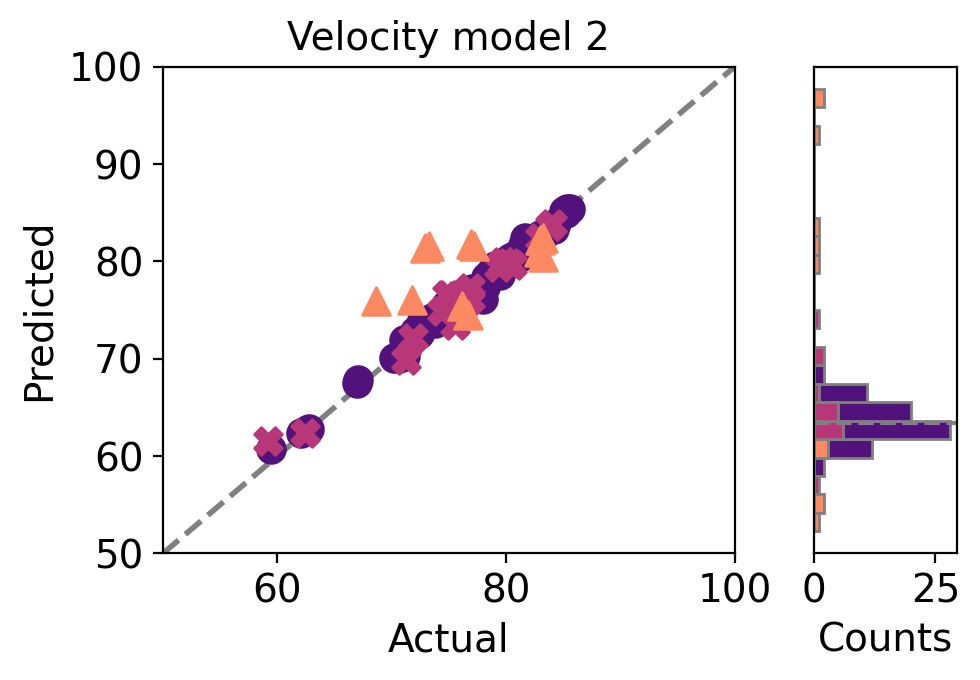

In [24]:
sns.reset_orig()
plt.rcdefaults()
set_matplotlib_formats('retina')
plt.rcParams['figure.figsize'] = (5, 3.5) 

colors = sns.color_palette("magma", 3)
train_color = colors[0]
val_color = colors[1]
test_color = colors[2]

train_errors = y_pred_train_2 - y_train_2
val_errors = y_pred_val_2 - y_val_2
test_errors = y_pred_test_2 - y_test_2

all_errors = np.concatenate([train_errors, val_errors, test_errors])
min_error, max_error = np.min(all_errors), np.max(all_errors)
bins = np.linspace(min_error, max_error, 25)  # Define 15 uniform bins

gs = GridSpec(1, 2, width_ratios=[4, 1])

ax0 = plt.subplot(gs[0])
ax0.scatter(y_train_2, y_pred_train_2, color=train_color, s=100, label='Train', marker='o')
ax0.scatter(y_val_2, y_pred_val_2, color=val_color, s=100, label='Validation', marker='X')
ax0.scatter(y_test_2, y_pred_test_2, color=test_color, s=100, label='Test', marker='^')
ax0.plot([50, 100], [50, 100], '--', lw=2, color="grey", zorder = 0)
ax0.set_xlabel('Actual', fontsize=14)
ax0.set_ylabel('Predicted', fontsize=14)
ax0.set_xlim(50, 100)
ax0.set_ylim(50, 100)
ax0.set_title('Velocity model 2', fontsize=14)
ax0.tick_params(axis='both', which='major', labelsize=14)

ax1 = plt.subplot(gs[1])
ax1.hist(train_errors, bins=bins,color=train_color, orientation='horizontal',  edgecolor = 'grey')
ax1.hist(val_errors, bins=bins, color=val_color, orientation='horizontal',  edgecolor = 'grey')
ax1.hist(test_errors, bins=bins, color=test_color, orientation='horizontal',  edgecolor = 'grey')
ax1.set_xlabel('Counts', fontsize=14)
# ax1.set_title('Error distribution', fontsize=14)
ax1.axhline(0, color='grey', linestyle='--', linewidth=1.5)
ax1.tick_params(axis='x', which='major', labelsize=14)
ax1.yaxis.set_ticks([]) 

plt.tight_layout()
plt.savefig(PLOT_DIR / 'velocity_model2.svg', format='svg', dpi = 2000,  bbox_inches='tight')
plt.show()

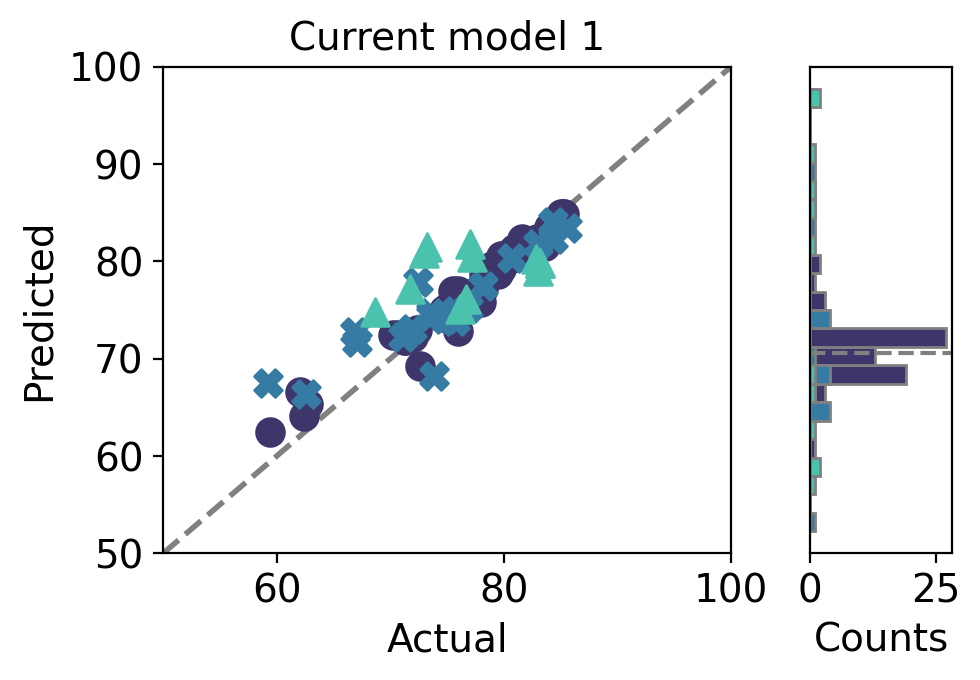

In [23]:
plt.rcParams['figure.figsize'] = (5, 3.5)

colors = sns.color_palette("mako", 3)
train_color = colors[0]
val_color = colors[1]
test_color = colors[2]

data_3 = np.load(MISC_DIR / 'predictions_and_labels_for_battery_data.npz')
y_pred_train_3, y_train_3, y_pred_val_3, y_val_3, y_pred_test_3, y_test_3 = (
    data_3['y_pred_train_3'], data_3['y_train_3'],
    data_3['y_pred_val_3'], data_3['y_val_3'],
    data_3['y_pred_test_3'], data_3['y_test_3']
)

train_errors = y_pred_train_3 - y_train_3
val_errors = y_pred_val_3 - y_val_3
test_errors = y_pred_test_3 - y_test_3

all_errors = np.concatenate([train_errors, val_errors, test_errors])
min_error, max_error = np.min(all_errors), np.max(all_errors)
bins = np.linspace(min_error, max_error, 25)  

gs = GridSpec(1, 2, width_ratios=[4, 1]) 

ax0 = plt.subplot(gs[0])
ax0.scatter(y_train_3, y_pred_train_3, color=train_color, s=100, label='Train', marker='o')
ax0.scatter(y_val_3, y_pred_val_3, color=val_color, s=100, label='Validation',marker='X')
ax0.scatter(y_test_3, y_pred_test_3, color=test_color, s=100, label='Test', marker='^')
ax0.plot([50, 100], [50, 100], '--', lw=2, color="grey", zorder = 0)  # Ideal parity line
ax0.set_xlabel('Actual', fontsize=14)
ax0.set_ylabel('Predicted', fontsize=14)
ax0.set_xlim(50, 100)
ax0.set_ylim(50, 100)
ax0.set_title('Current model 1', fontsize=14)
ax0.tick_params(axis='both', which='major', labelsize=14)

ax1 = plt.subplot(gs[1])
ax1.hist(train_errors, bins=bins, color=train_color, orientation='horizontal', label='Train', edgecolor='grey')
ax1.hist(val_errors, bins=bins, color=val_color, orientation='horizontal', label='Validation', edgecolor='grey')
ax1.hist(test_errors, bins=bins, color=test_color, orientation='horizontal', label='Test', edgecolor='grey')
ax1.set_xlabel('Counts', fontsize=14)
# ax1.set_title('Error Distribution', fontsize=14)
ax1.axhline(0, color='grey', linestyle='--', linewidth=1.5)
ax1.tick_params(axis='x', which='major', labelsize=14)
ax1.yaxis.set_ticks([]) 


plt.tight_layout()
plt.savefig(PLOT_DIR / 'current_model1.svg', format='svg', dpi = 2000,  bbox_inches='tight')
plt.show()

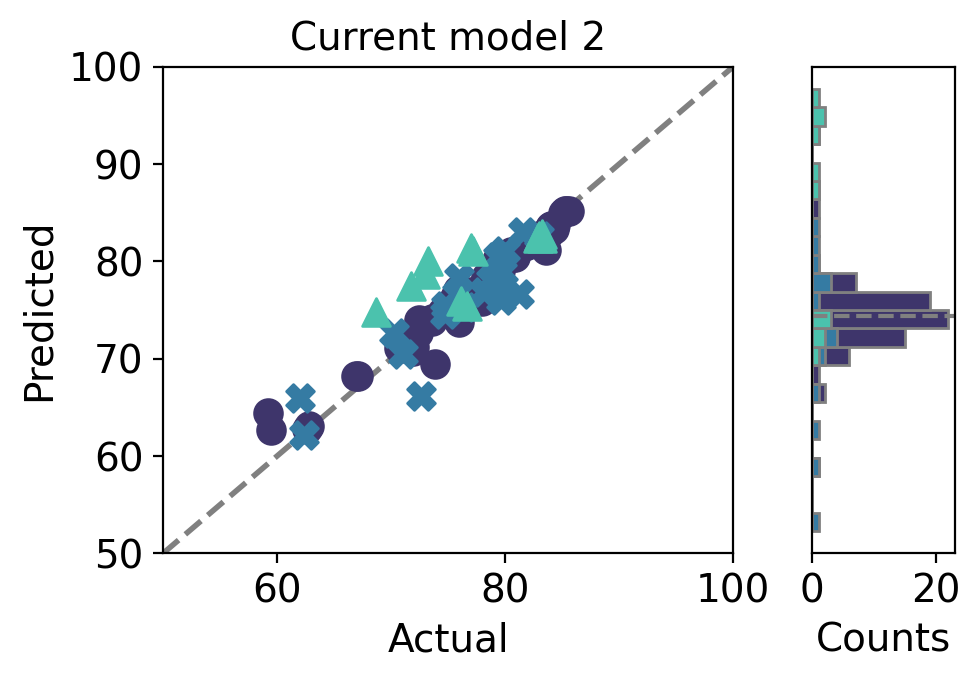

In [22]:
plt.rcParams['figure.figsize'] = (5, 3.5)  
colors = sns.color_palette("mako", 3)
train_color = colors[0]
val_color = colors[1]
test_color = colors[2]

data_4 = np.load(MISC_DIR / 'predictions_and_labels_for_battery_data+classification.npz')
y_pred_train_4, y_train_4, y_pred_val_4, y_val_4, y_pred_test_4, y_test_4 = (
    data_4['y_pred_train_4'], data_4['y_train_4'],
    data_4['y_pred_val_4'], data_4['y_val_4'],
    data_4['y_pred_test_4'], data_4['y_test_4']
)

train_errors = y_pred_train_4 - y_train_4
val_errors = y_pred_val_4 - y_val_4
test_errors = y_pred_test_4 - y_test_4

all_errors = np.concatenate([train_errors, val_errors, test_errors])
min_error, max_error = np.min(all_errors), np.max(all_errors)
bins = np.linspace(min_error, max_error, 25)  # Define 15 uniform bins across all errors

gs = GridSpec(1, 2, width_ratios=[4, 1])  
ax0 = plt.subplot(gs[0])
ax0.scatter(y_train_4, y_pred_train_4, color=train_color, s=100, label='Train', marker='o')
ax0.scatter(y_val_4, y_pred_val_4, color=val_color, s=100, label='Validation', marker='X')
ax0.scatter(y_test_4, y_pred_test_4, color=test_color, s=100, label='Test', marker='^')
ax0.plot([50, 100], [50, 100], '--', lw=2, color="grey", zorder = 0)  
ax0.set_xlabel('Actual', fontsize=14)
ax0.set_ylabel('Predicted', fontsize=14)
ax0.set_xlim(50, 100)
ax0.set_ylim(50, 100)
ax0.set_title('Current model 2', fontsize=14)
ax0.tick_params(axis='both', which='major', labelsize=14)

ax1 = plt.subplot(gs[1])
ax1.hist(train_errors, bins=bins, color=train_color, orientation='horizontal', label='Train',  edgecolor='grey')
ax1.hist(val_errors, bins=bins, color=val_color, orientation='horizontal', label='Validation', edgecolor='grey')
ax1.hist(test_errors, bins=bins,  color=test_color, orientation='horizontal', label='Test', edgecolor='grey')
ax1.set_xlabel('Counts', fontsize=14)
# ax1.set_title('Error Distribution', fontsize=12)
ax1.axhline(0, color='grey', linestyle='--', linewidth=1.5)
ax1.tick_params(axis='x', which='major', labelsize=14)
ax1.yaxis.set_ticks([]) 

plt.tight_layout()
plt.savefig(PLOT_DIR / 'current_model2.svg', format='svg', dpi = 2000,  bbox_inches='tight')
plt.show()

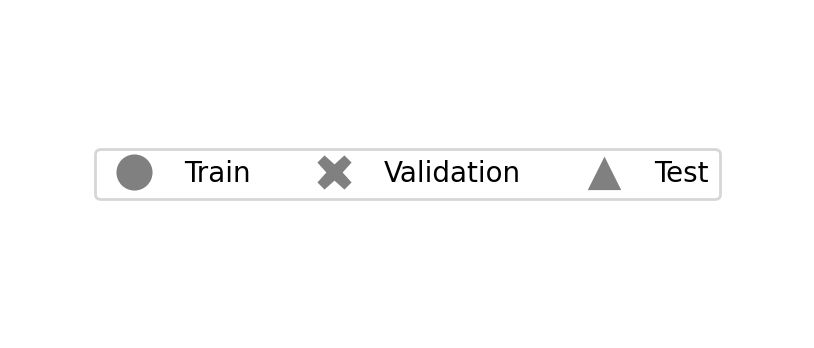

In [17]:
sns.reset_orig()
plt.rcdefaults()
set_matplotlib_formats('retina')
legend_labels = ['Train', 'Validation', 'Test']
colors = 'grey'
markers = ['o', 'X', '^']

fig, ax = plt.subplots(figsize=(5, 2))

fig.legend(handles=[plt.Line2D([0], [0], marker=markers[i], color='w', markerfacecolor=colors, markersize=14, label=legend_labels[i]) for i in range(3)],
           loc='center', frameon=True, ncol=3)

ax.axis('off')
plt.savefig(PLOT_DIR / 'parity_legend.svg', format='svg', dpi = 2000,  bbox_inches='tight')
plt.show()